<a href="https://colab.research.google.com/github/balbaross/DSF5/blob/master/Divorce_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

print("Libraries imported successfully.")

Libraries imported successfully.


In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving divorce.csv to divorce (1).csv
User uploaded file "divorce (1).csv" with length 800952 bytes


In [ ]:
# Assuming the uploaded file is a CSV, replace 'your_dataset.csv' with the actual filename
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

print("\nDataset loaded successfully.")
print("First 5 rows of the dataset:")
display(df.head())


Dataset loaded successfully.
First 5 rows of the dataset:


,age_at_marriage,marriage_duration_years,num_children,education_level,employment_status,combined_income,religious_compatibility,cultural_background_match,communication_score,conflict_frequency,...,mental_health_issues,infidelity_occurred,counseling_attended,social_support,shared_hobbies_count,marriage_type,pre_marital_cohabitation,domestic_violence_history,trust_score,divorced
0,30,1,1,Bachelor,Full-time,64001,Different Religion,Yes,5.536016,3,...,No,No,No,8.428183,5,Love,Yes,No,6.262411,1
1,27,2,2,Master,Full-time,86221,Same Religion,Yes,5.810172,3,...,No,Yes,No,5.297221,1,Love,Yes,No,6.769384,1
2,31,6,0,High School,Part-time,69441,Same Religion,No,6.088146,3,...,No,No,No,5.887066,1,Arranged,Yes,No,5.532866,1
3,35,3,2,Bachelor,Full-time,69513,Not Religious,Yes,6.212046,3,...,No,No,No,5.263555,5,Love,Yes,No,3.491264,0
4,26,2,2,No Formal Education,Full-time,63986,Different Religion,Yes,4.826262,1,...,No,No,Yes,5.771259,4,Love,Yes,No,10.000000,1


In [ ]:
df_copy = df.copy()

print("Dataset copied successfully to df_copy.")
display(df_copy.head(10))

Dataset copied successfully to df_copy.


,age_at_marriage,marriage_duration_years,num_children,education_level,employment_status,combined_income,religious_compatibility,cultural_background_match,communication_score,conflict_frequency,...,mental_health_issues,infidelity_occurred,counseling_attended,social_support,shared_hobbies_count,marriage_type,pre_marital_cohabitation,domestic_violence_history,trust_score,divorced
0,30,1,1,Bachelor,Full-time,64001,Different Religion,Yes,5.536016,3,...,No,No,No,8.428183,5,Love,Yes,No,6.262411,1
1,27,2,2,Master,Full-time,86221,Same Religion,Yes,5.810172,3,...,No,Yes,No,5.297221,1,Love,Yes,No,6.769384,1
2,31,6,0,High School,Part-time,69441,Same Religion,No,6.088146,3,...,No,No,No,5.887066,1,Arranged,Yes,No,5.532866,1
3,35,3,2,Bachelor,Full-time,69513,Not Religious,Yes,6.212046,3,...,No,No,No,5.263555,5,Love,Yes,No,3.491264,0
4,26,2,2,No Formal Education,Full-time,63986,Different Religion,Yes,4.826262,1,...,No,No,Yes,5.771259,4,Love,Yes,No,10.000000,1
5,26,10,0,High School,Full-time,44605,Same Religion,No,6.825964,3,...,No,No,No,6.909350,3,Love,Yes,No,4.628149,0
6,35,10,2,High School,Full-time,73454,Different Religion,Yes,3.775491,1,...,No,No,No,7.351375,1,Love,Yes,No,5.753932,0
7,31,17,1,High School,Unemployed,59491,Not Religious,Yes,6.613021,4,...,No,No,No,8.709813,2,Love,No,No,7.010559,1
8,25,5,1,Bachelor,Full-time,40944,Not Religious,No,2.963345,0,...,No,No,No,8.727489,3,Arranged,Yes,No,2.428385,0
9,30,1,0,PhD,Full-time,46819,Same Religion,Yes,3.612109,1,...,Yes,No,No,5.939285,1,Arranged,Yes,No,8.750676,1


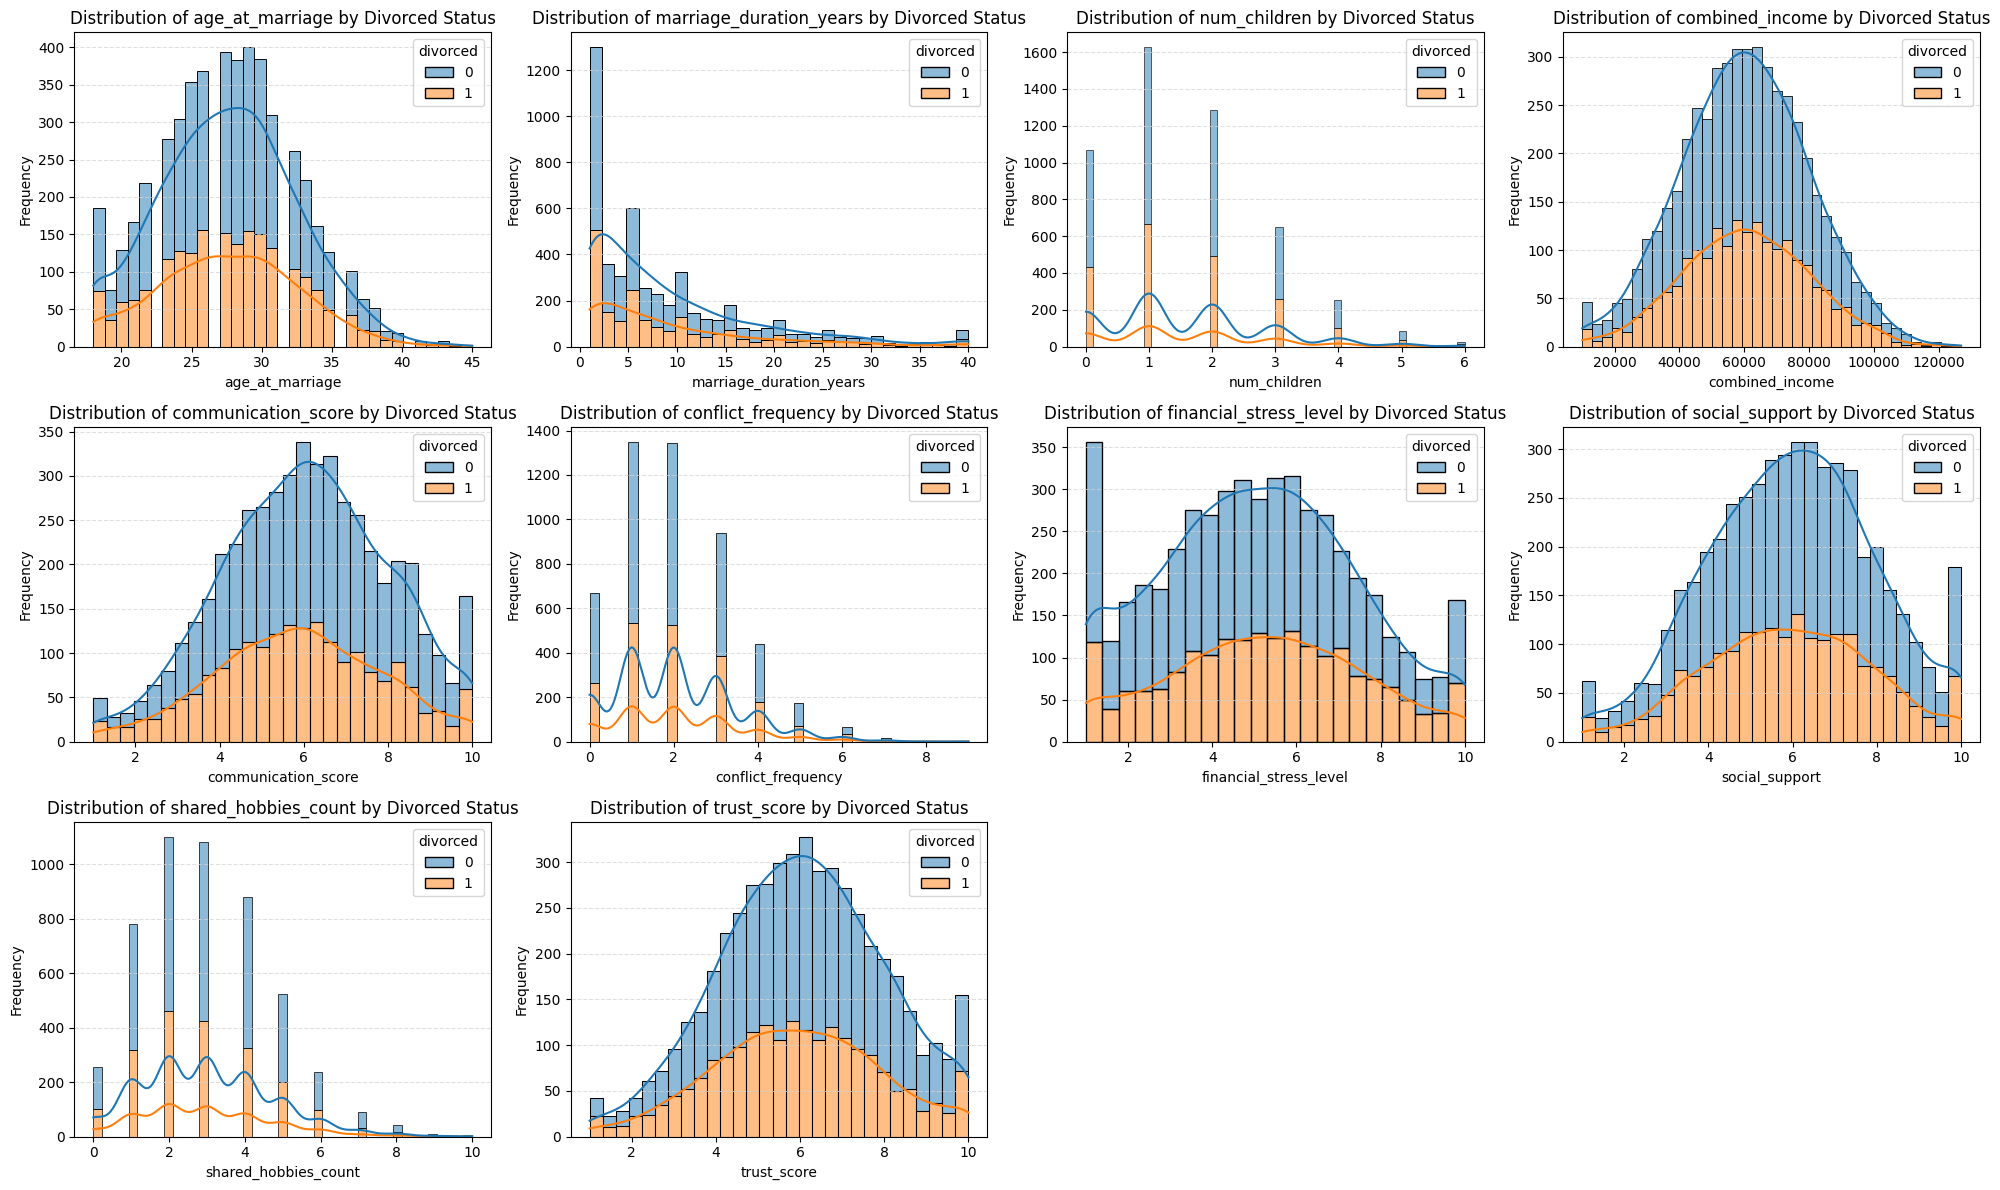

In [ ]:
# Visualize continuous variables with histograms (excluding 'divorced') by divorced status
continuous_cols = df_copy.select_dtypes(include=np.number).drop(columns=['divorced'])
n_cols = 4  # Number of columns for subplots
n_rows = (len(continuous_cols.columns) + n_cols - 1) // n_cols  # Calculate number of rows

plt.figure(figsize=(n_cols * 5, n_rows * 4)) # Adjust figure size based on number of plots

for i, col in enumerate(continuous_cols.columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(data=df_copy, x=col, hue='divorced', kde=True, multiple='stack') # Use hue to differentiate divorced groups
    plt.title(f'Distribution of {col} by Divorced Status')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7, color='lightgray') # Add light gray grid

plt.tight_layout()
plt.show()

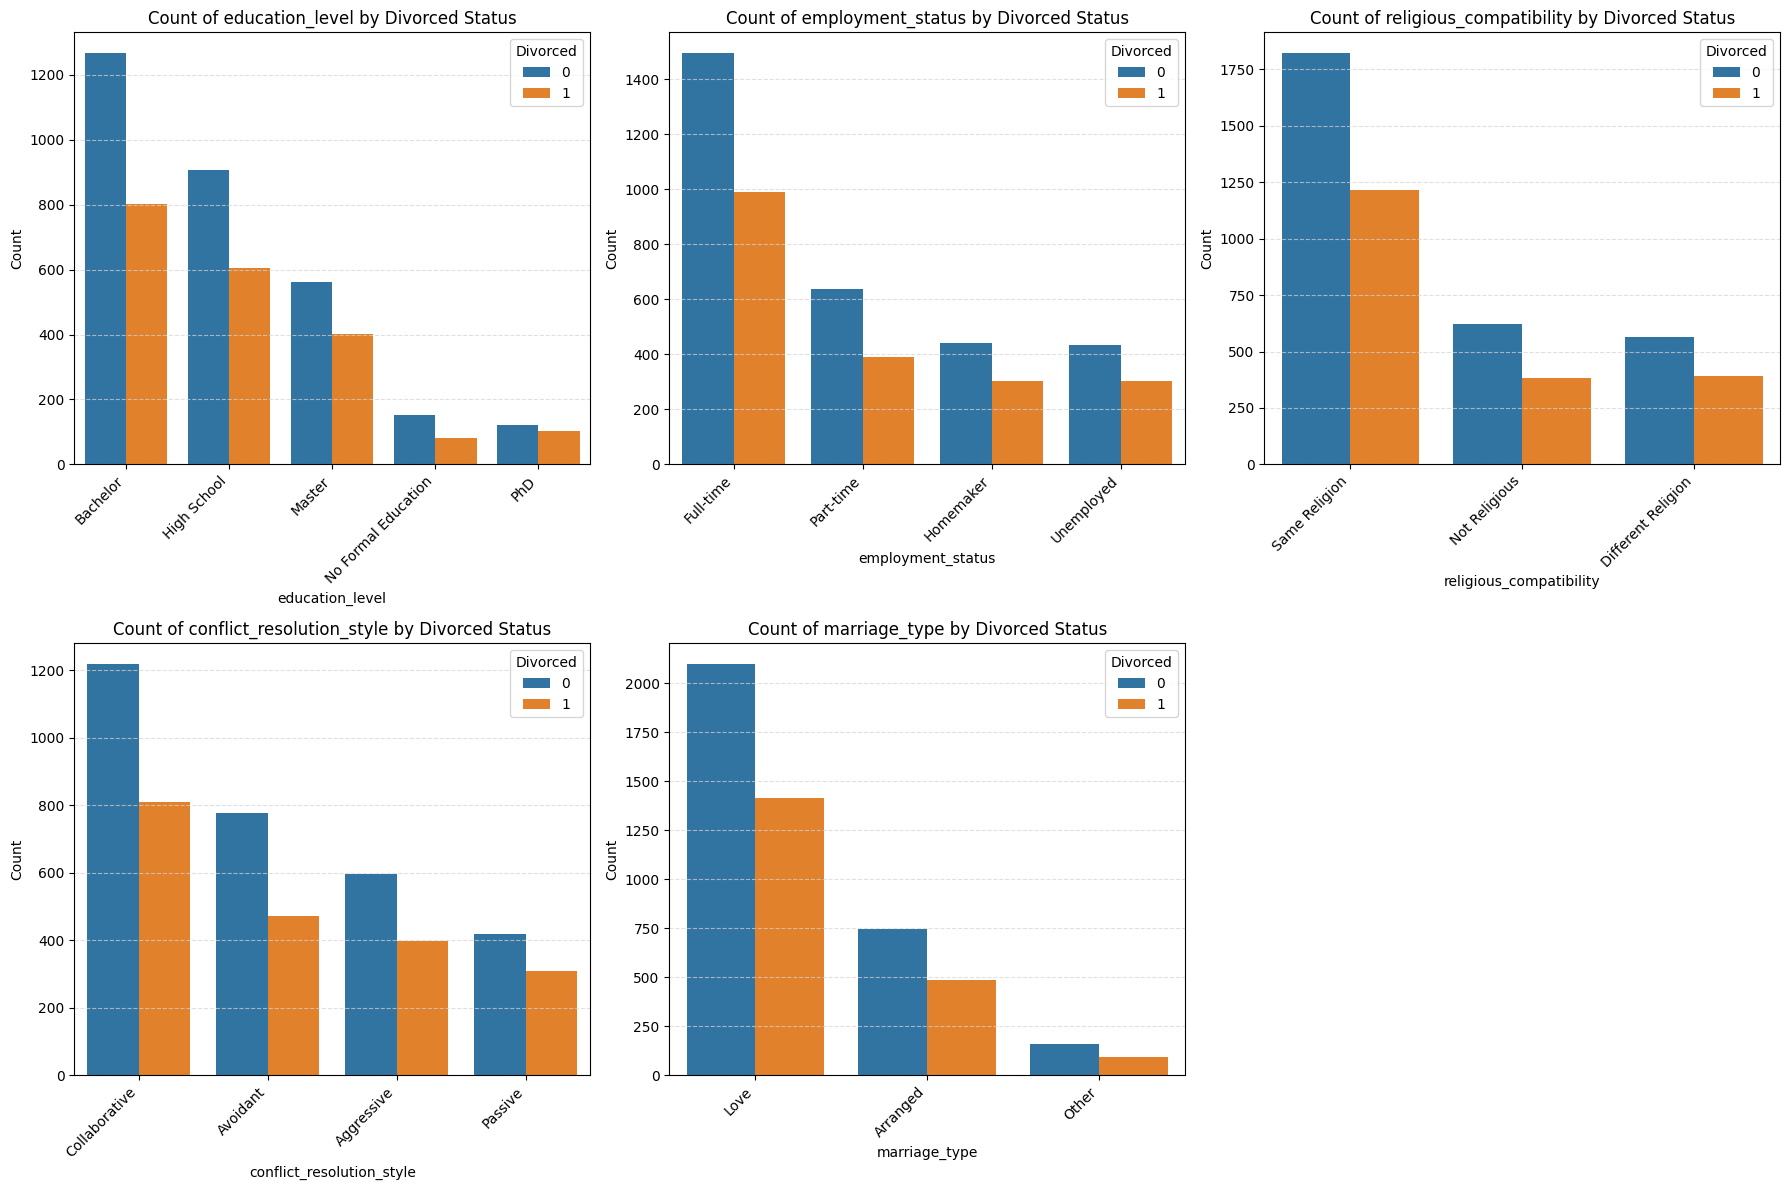

In [ ]:
# Visualize categorical and binary variables with count plots by divorced status
categorical_cols = df_copy.select_dtypes(include='object')

# Filter out columns that resulted in empty plots (based on previous execution output)
# The columns that resulted in empty Series were:
# 'cultural_background_match', 'mental_health_issues', 'infidelity_occurred',
# 'counseling_attended', 'pre_marital_cohabitation', 'domestic_violence_history'
cols_to_exclude = ['cultural_background_match', 'mental_health_issues', 'infidelity_occurred',
                   'counseling_attended', 'pre_marital_cohabitation', 'domestic_violence_history']
categorical_cols = categorical_cols.drop(columns=cols_to_exclude, errors='ignore')


n_cols = 3  # Number of columns for subplots
n_rows = (len(categorical_cols.columns) + n_cols - 1) // n_cols  # Calculate number of rows

plt.figure(figsize=(n_cols * 6, n_rows * 6)) # Adjust figure size based on number of plots

for i, col in enumerate(categorical_cols.columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.countplot(data=df_copy, x=col, hue='divorced', order=df_copy[col].value_counts().index) # Use hue to differentiate divorced groups
    plt.title(f'Count of {col} by Divorced Status')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Divorced') # Add a legend
    plt.grid(axis='y', linestyle='--', alpha=0.7, color='lightgray') # Add light gray grid

plt.tight_layout()
plt.show()

In [ ]:
# Separate continuous and categorical/binary variables

# Identify binary columns (only contain 0 and 1)
binary_cols = df_copy.columns[(df_copy.nunique() == 2) & (df_copy.apply(lambda x: set(x.unique()) == {0, 1} or set(x.unique()) == {0} or set(x.unique()) == {1}).all())].tolist()

# Identify categorical columns (object dtype and not binary)
categorical_cols = df_copy.select_dtypes(include='object').columns.tolist()

# Identify continuous columns (numeric dtype and not binary)
continuous_cols = df_copy.select_dtypes(include=np.number).columns.tolist()
continuous_cols = [col for col in continuous_cols if col not in binary_cols]

print("Continuous Variables:")
display(continuous_cols)

print("\nBinary Variables:")
display(binary_cols)

print("\nCategorical Variables:")
display(categorical_cols)

# Summary for continuous variables (Mean and Standard Deviation) by Divorced Status
print("\nSummary of Continuous Variables (Mean and Standard Deviation) by Divorced Status:")
display(df_copy.groupby('divorced')[continuous_cols].agg(['mean', 'std']).T)

print("\nPercentages for Categorical and Binary Variables by Divorced Status:")
# Create a dictionary to store categorical summaries
categorical_binary_summaries = {}
for col in categorical_cols + binary_cols:
    print(f"\nColumn: {col}")
    col_summary = df_copy.groupby('divorced')[col].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
    display(col_summary)
    categorical_binary_summaries[col] = col_summary.unstack(level=0) # Unstack to get divorced status as columns

# Example of how to access a specific categorical summary DataFrame
# education_level_summary_df = categorical_binary_summaries['education_level']
# display(education_level_summary_df)

Continuous Variables:


['age_at_marriage',
 'marriage_duration_years',
 'num_children',
 'combined_income',
 'communication_score',
 'conflict_frequency',
 'financial_stress_level',
 'social_support',
 'shared_hobbies_count',
 'trust_score',
 'divorced']


Binary Variables:


[]


Categorical Variables:


['education_level',
 'employment_status',
 'religious_compatibility',
 'cultural_background_match',
 'conflict_resolution_style',
 'mental_health_issues',
 'infidelity_occurred',
 'counseling_attended',
 'marriage_type',
 'pre_marital_cohabitation',
 'domestic_violence_history']


Summary of Continuous Variables (Mean and Standard Deviation) by Divorced Status:


divorced                                 0             1
age_at_marriage         mean     27.554005     27.628327
                        std       4.801563      4.937955
marriage_duration_years mean      9.098372      9.280763
                        std       8.753322      8.990952
num_children            mean      1.557993      1.544952
                        std       1.239065      1.260479
combined_income         mean  60029.539050  60508.040683
                        std   19725.160773  19567.787680
communication_score     mean      6.160605      5.859002
                        std       1.953886      1.964163
conflict_frequency      mean      1.995680      2.026620
                        std       1.407964      1.419107
financial_stress_level  mean      4.938108      5.272970
                        std       2.334331      2.300122
social_support          mean      6.020800      5.885323
                        std       1.964432      1.964805
shared_hobbies_count    mean      2.996012      2.937217
                        std       1.711580      1.711791
trust_score             mean      6.109617      5.910994
                        std       1.900933      1.974763
divorced                mean      0.000000      1.000000
                        std       0.000000      0.000000


Percentages for Categorical and Binary Variables by Divorced Status:

Column: education_level


divorced  education_level    
0         Bachelor               42.11%
          High School            30.18%
          Master                 18.64%
          No Formal Education     5.02%
          PhD                     4.05%
1         Bachelor               40.28%
          High School            30.39%
          Master                 20.19%
          PhD                     5.12%
          No Formal Education     4.02%
Name: proportion, dtype: object


Column: employment_status


divorced  employment_status
0         Full-time            49.72%
          Part-time            21.17%
          Homemaker            14.72%
          Unemployed           14.39%
1         Full-time            49.77%
          Part-time            19.64%
          Homemaker            15.32%
          Unemployed           15.27%
Name: proportion, dtype: object


Column: religious_compatibility


divorced  religious_compatibility
0         Same Religion              60.58%
          Not Religious              20.64%
          Different Religion         18.78%
1         Same Religion              61.13%
          Different Religion         19.69%
          Not Religious              19.19%
Name: proportion, dtype: object


Column: cultural_background_match


divorced  cultural_background_match
0         Yes                          75.91%
          No                           24.09%
1         Yes                          74.99%
          No                           25.01%
Name: proportion, dtype: object


Column: conflict_resolution_style


divorced  conflict_resolution_style
0         Collaborative                40.51%
          Avoidant                     25.82%
          Aggressive                   19.77%
          Passive                      13.89%
1         Collaborative                40.63%
          Avoidant                     23.76%
          Aggressive                   20.04%
          Passive                      15.57%
Name: proportion, dtype: object


Column: mental_health_issues


divorced  mental_health_issues
0         No                      80.86%
          Yes                     19.14%
1         No                      77.75%
          Yes                     22.25%
Name: proportion, dtype: object


Column: infidelity_occurred


divorced  infidelity_occurred
0         No                     87.27%
          Yes                    12.73%
1         No                     81.82%
          Yes                    18.18%
Name: proportion, dtype: object


Column: counseling_attended


divorced  counseling_attended
0         No                     76.27%
          Yes                    23.73%
1         No                     75.49%
          Yes                    24.51%
Name: proportion, dtype: object


Column: marriage_type


divorced  marriage_type
0         Love             69.79%
          Arranged         24.83%
          Other             5.38%
1         Love             70.97%
          Arranged         24.31%
          Other             4.72%
Name: proportion, dtype: object


Column: pre_marital_cohabitation


divorced  pre_marital_cohabitation
0         Yes                         60.22%
          No                          39.78%
1         Yes                         57.71%
          No                          42.29%
Name: proportion, dtype: object


Column: domestic_violence_history


divorced  domestic_violence_history
0         No                           96.38%
          Yes                           3.62%
1         No                           92.82%
          Yes                           7.18%
Name: proportion, dtype: object

In [ ]:
# Step 1: Separate Data by Divorced Status
df_divorced = df_copy[df_copy['divorced'] == 1]
df_nondivorced = df_copy[df_copy['divorced'] == 0]

print("Data separated by divorced status.")
print(f"Divorced group shape: {df_divorced.shape}")
print(f"Non-divorced group shape: {df_nondivorced.shape}")

Data separated by divorced status.
Divorced group shape: (1991, 22)
Non-divorced group shape: (3009, 22)


Analyzing Continuous Variables:

Analyzing column: age_at_marriage

Test of Assumption: Normality (Shapiro-Wilk Test and QQ Plots)
Note: Non-parametric tests do not assume normality, but understanding the distribution is still helpful.

Shapiro-Wilk Test for age_at_marriage (Divorced Group):
Statistic: 0.9890, P-value: 0.0000
Conclusion: Reject the null hypothesis. The data in the divorced group is likely not normally distributed.

Shapiro-Wilk Test for age_at_marriage (Non-Divorced Group):
Statistic: 0.9897, P-value: 0.0000
Conclusion: Reject the null hypothesis. The data in the non-divorced group is likely not normally distributed.


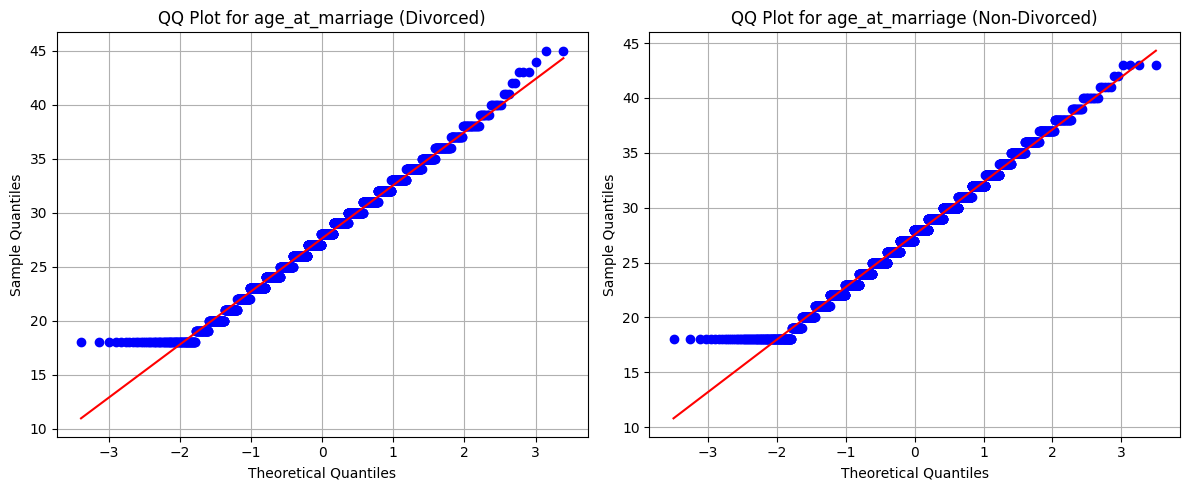


Test of Assumption: Equality of Variances (Levene's Test)
Null Hypothesis (H0): The variances of {col} are equal for divorced and non-divorced groups.
Working Hypothesis (H1): The variances of {col} are not equal for divorced and non-divorced groups.
Levene's Test Statistic: 2.5708, P-value: 0.1089
Conclusion: Fail to reject the null hypothesis. The variances may be equal.

Performing Mann-Whitney U Test:
Null Hypothesis (H0): The distribution of age_at_marriage is the same for divorced and non-divorced groups.
Working Hypothesis (H1): The distribution of age_at_marriage is different for divorced and non-divorced groups.

Mann-Whitney U Test Results for age_at_marriage:
Statistic: 3023111.0000
P-value: 0.5793
Conclusion: Fail to reject the null hypothesis. There is no significant difference in the distribution of age_at_marriage between divorced and non-divorced groups.


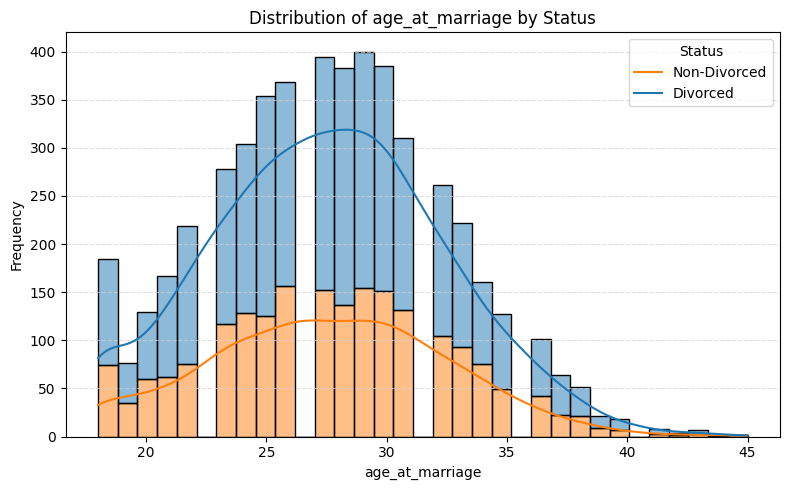

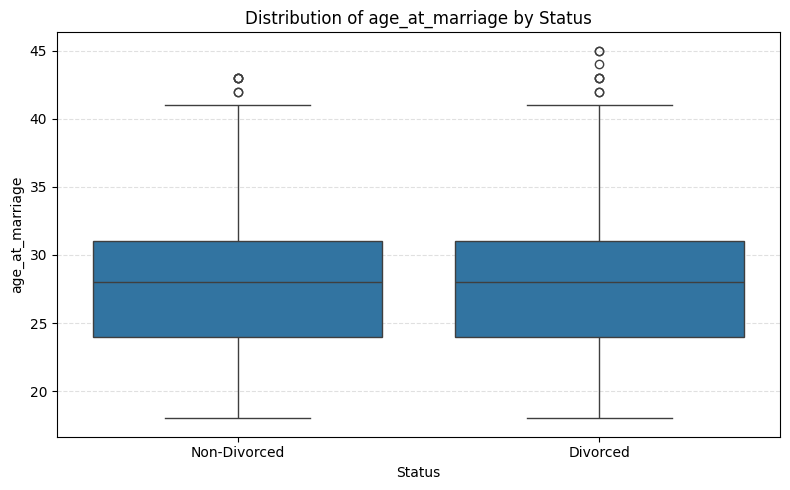


Analyzing column: marriage_duration_years

Test of Assumption: Normality (Shapiro-Wilk Test and QQ Plots)
Note: Non-parametric tests do not assume normality, but understanding the distribution is still helpful.

Shapiro-Wilk Test for marriage_duration_years (Divorced Group):
Statistic: 0.8292, P-value: 0.0000
Conclusion: Reject the null hypothesis. The data in the divorced group is likely not normally distributed.

Shapiro-Wilk Test for marriage_duration_years (Non-Divorced Group):
Statistic: 0.8349, P-value: 0.0000
Conclusion: Reject the null hypothesis. The data in the non-divorced group is likely not normally distributed.


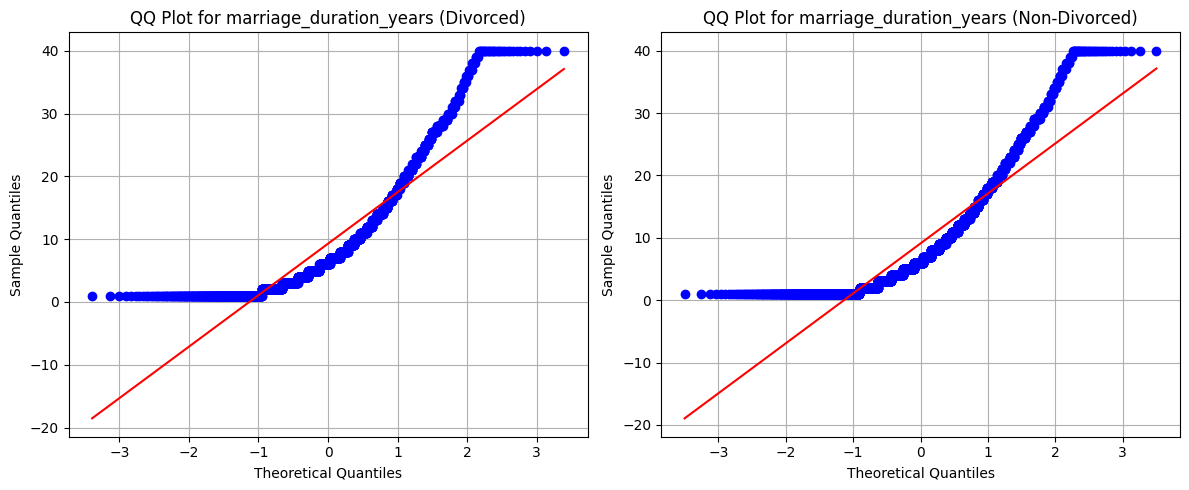


Test of Assumption: Equality of Variances (Levene's Test)
Null Hypothesis (H0): The variances of {col} are equal for divorced and non-divorced groups.
Working Hypothesis (H1): The variances of {col} are not equal for divorced and non-divorced groups.
Levene's Test Statistic: 0.2632, P-value: 0.6079
Conclusion: Fail to reject the null hypothesis. The variances may be equal.

Performing Mann-Whitney U Test:
Null Hypothesis (H0): The distribution of marriage_duration_years is the same for divorced and non-divorced groups.
Working Hypothesis (H1): The distribution of marriage_duration_years is different for divorced and non-divorced groups.

Mann-Whitney U Test Results for marriage_duration_years:
Statistic: 3024009.5000
P-value: 0.5663
Conclusion: Fail to reject the null hypothesis. There is no significant difference in the distribution of marriage_duration_years between divorced and non-divorced groups.


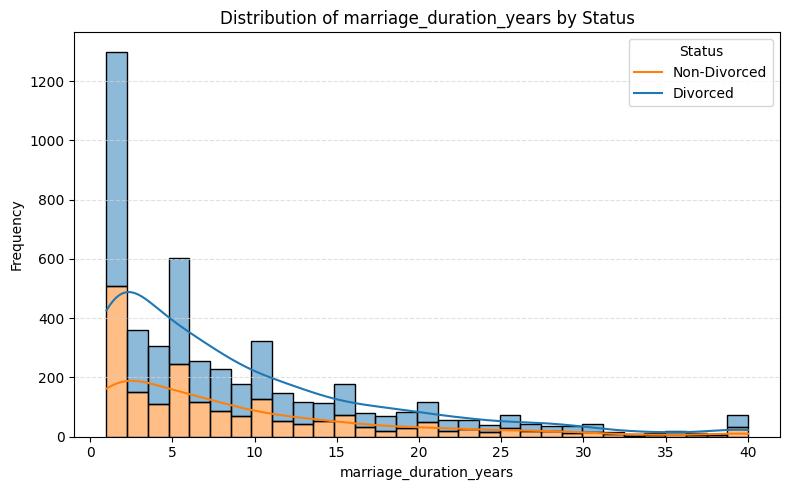

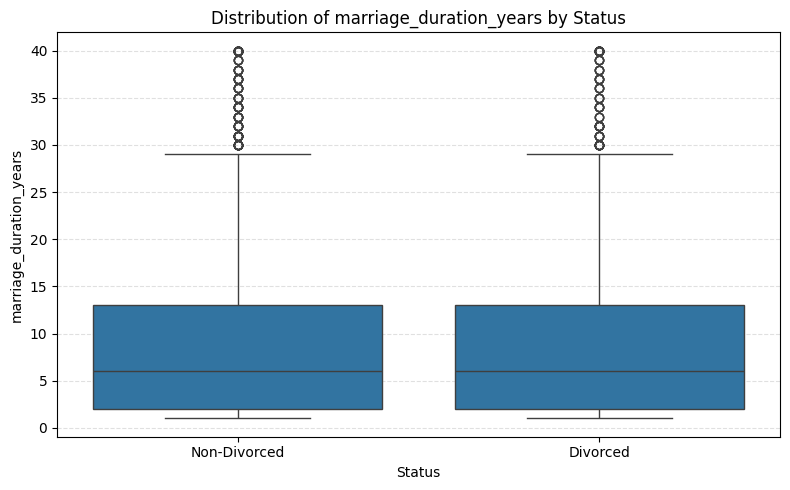


Analyzing column: num_children

Test of Assumption: Normality (Shapiro-Wilk Test and QQ Plots)
Note: Non-parametric tests do not assume normality, but understanding the distribution is still helpful.

Shapiro-Wilk Test for num_children (Divorced Group):
Statistic: 0.8914, P-value: 0.0000
Conclusion: Reject the null hypothesis. The data in the divorced group is likely not normally distributed.

Shapiro-Wilk Test for num_children (Non-Divorced Group):
Statistic: 0.8976, P-value: 0.0000
Conclusion: Reject the null hypothesis. The data in the non-divorced group is likely not normally distributed.


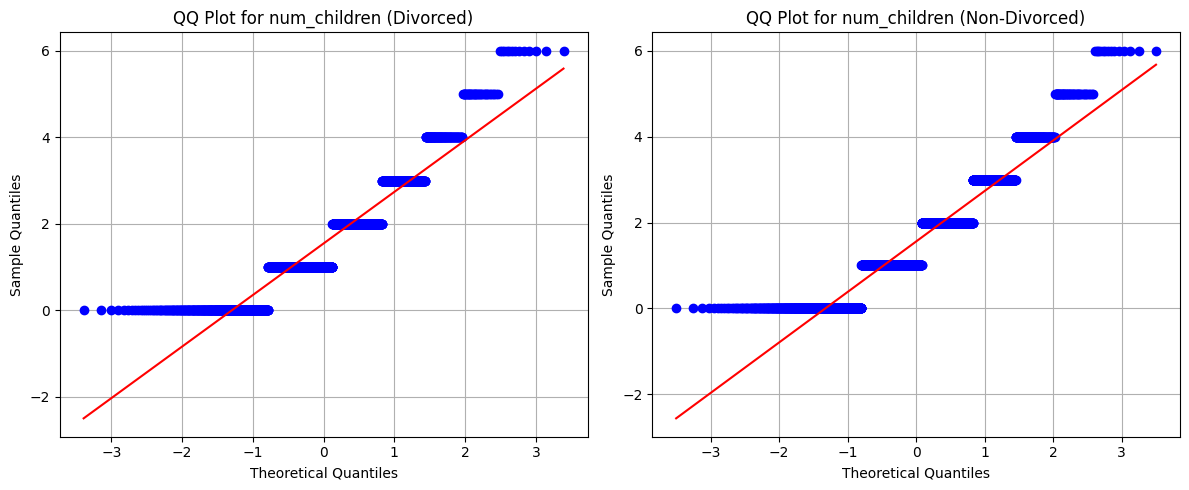


Test of Assumption: Equality of Variances (Levene's Test)
Null Hypothesis (H0): The variances of {col} are equal for divorced and non-divorced groups.
Working Hypothesis (H1): The variances of {col} are not equal for divorced and non-divorced groups.
Levene's Test Statistic: 0.0451, P-value: 0.8318
Conclusion: Fail to reject the null hypothesis. The variances may be equal.

Performing Mann-Whitney U Test:
Null Hypothesis (H0): The distribution of num_children is the same for divorced and non-divorced groups.
Working Hypothesis (H1): The distribution of num_children is different for divorced and non-divorced groups.

Mann-Whitney U Test Results for num_children:
Statistic: 2962020.0000
P-value: 0.4892
Conclusion: Fail to reject the null hypothesis. There is no significant difference in the distribution of num_children between divorced and non-divorced groups.


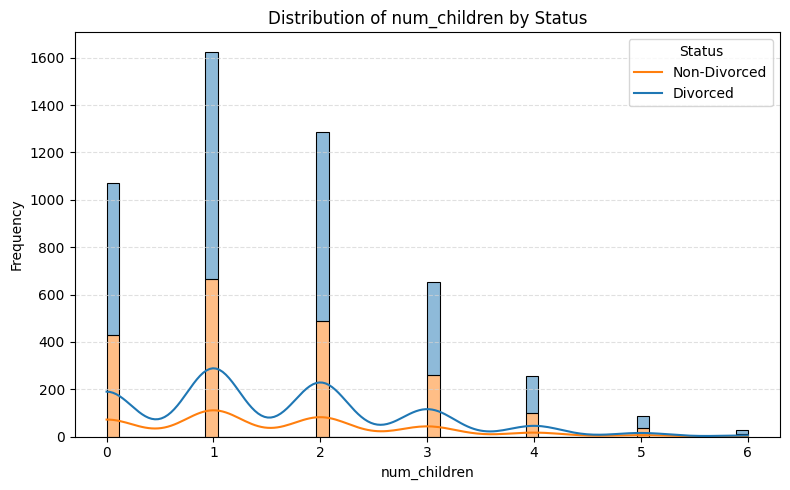

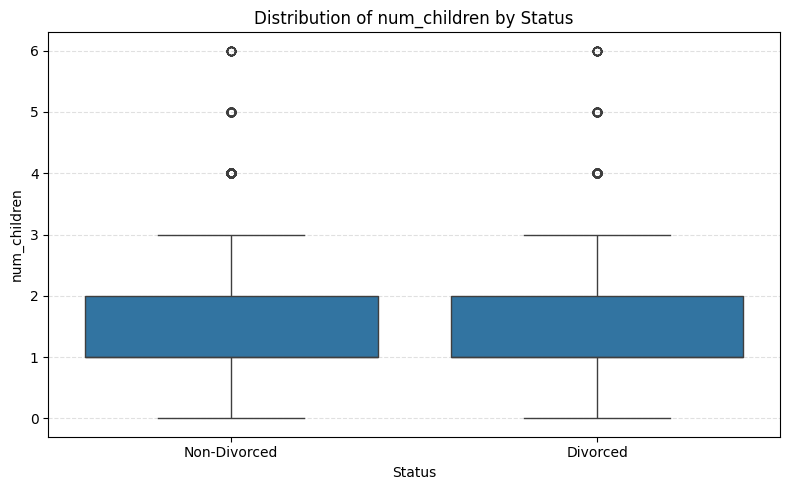


Analyzing column: combined_income

Test of Assumption: Normality (Shapiro-Wilk Test and QQ Plots)
Note: Non-parametric tests do not assume normality, but understanding the distribution is still helpful.

Shapiro-Wilk Test for combined_income (Divorced Group):
Statistic: 0.9986, P-value: 0.1134
Conclusion: Fail to reject the null hypothesis. The data in the divorced group may be normally distributed.

Shapiro-Wilk Test for combined_income (Non-Divorced Group):
Statistic: 0.9984, P-value: 0.0054
Conclusion: Reject the null hypothesis. The data in the non-divorced group is likely not normally distributed.


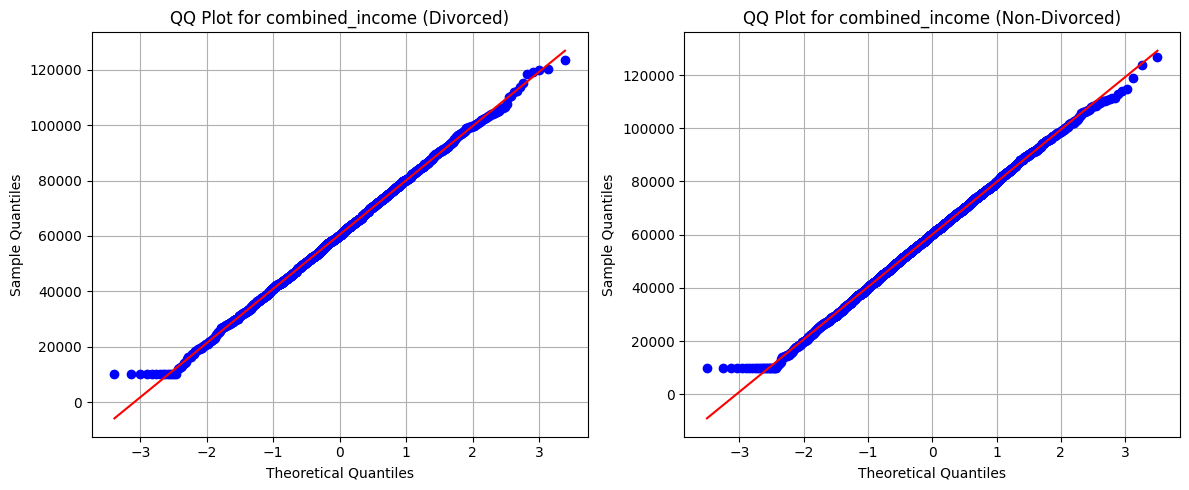


Test of Assumption: Equality of Variances (Levene's Test)
Null Hypothesis (H0): The variances of {col} are equal for divorced and non-divorced groups.
Working Hypothesis (H1): The variances of {col} are not equal for divorced and non-divorced groups.
Levene's Test Statistic: 0.0892, P-value: 0.7652
Conclusion: Fail to reject the null hypothesis. The variances may be equal.

Performing Mann-Whitney U Test:
Null Hypothesis (H0): The distribution of combined_income is the same for divorced and non-divorced groups.
Working Hypothesis (H1): The distribution of combined_income is different for divorced and non-divorced groups.

Mann-Whitney U Test Results for combined_income:
Statistic: 3028194.5000
P-value: 0.5124
Conclusion: Fail to reject the null hypothesis. There is no significant difference in the distribution of combined_income between divorced and non-divorced groups.


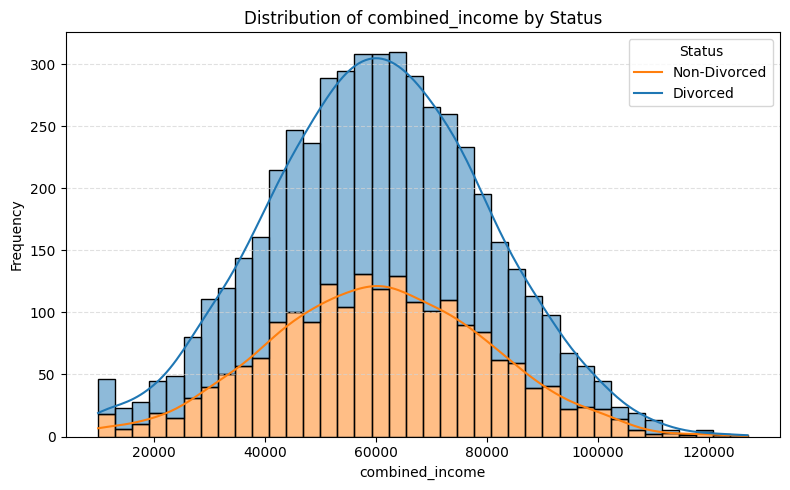

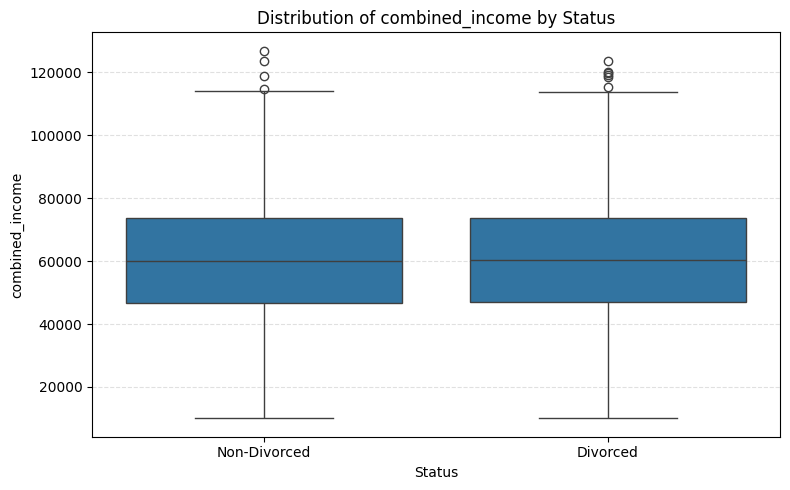


Analyzing column: communication_score

Test of Assumption: Normality (Shapiro-Wilk Test and QQ Plots)
Note: Non-parametric tests do not assume normality, but understanding the distribution is still helpful.

Shapiro-Wilk Test for communication_score (Divorced Group):
Statistic: 0.9936, P-value: 0.0000
Conclusion: Reject the null hypothesis. The data in the divorced group is likely not normally distributed.

Shapiro-Wilk Test for communication_score (Non-Divorced Group):
Statistic: 0.9914, P-value: 0.0000
Conclusion: Reject the null hypothesis. The data in the non-divorced group is likely not normally distributed.


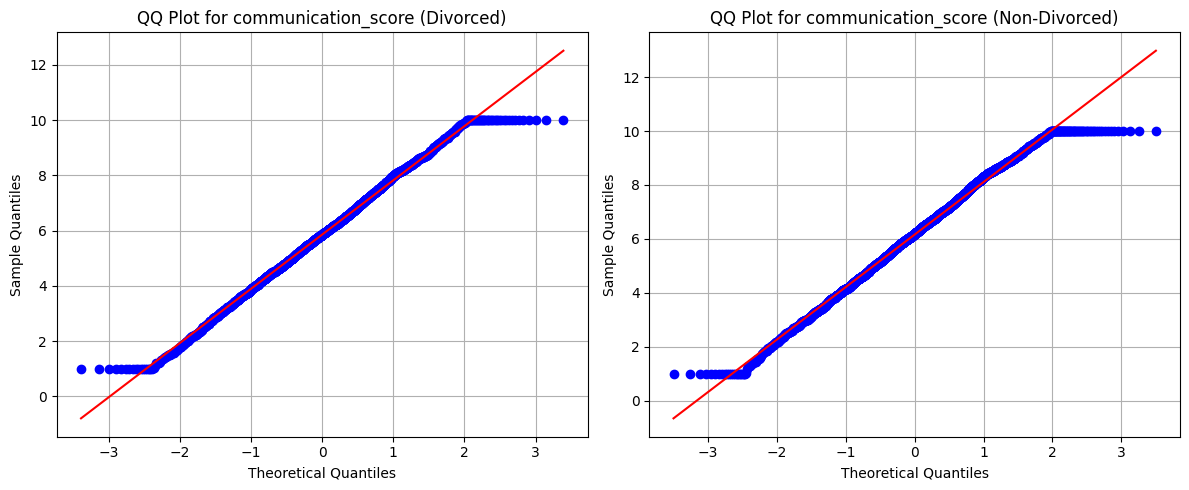


Test of Assumption: Equality of Variances (Levene's Test)
Null Hypothesis (H0): The variances of {col} are equal for divorced and non-divorced groups.
Working Hypothesis (H1): The variances of {col} are not equal for divorced and non-divorced groups.
Levene's Test Statistic: 0.0059, P-value: 0.9387
Conclusion: Fail to reject the null hypothesis. The variances may be equal.

Performing Mann-Whitney U Test:
Null Hypothesis (H0): The distribution of communication_score is the same for divorced and non-divorced groups.
Working Hypothesis (H1): The distribution of communication_score is different for divorced and non-divorced groups.

Mann-Whitney U Test Results for communication_score:
Statistic: 2729718.5000
P-value: 0.0000
Conclusion: Reject the null hypothesis. There is a significant difference in the distribution of communication_score between divorced and non-divorced groups.


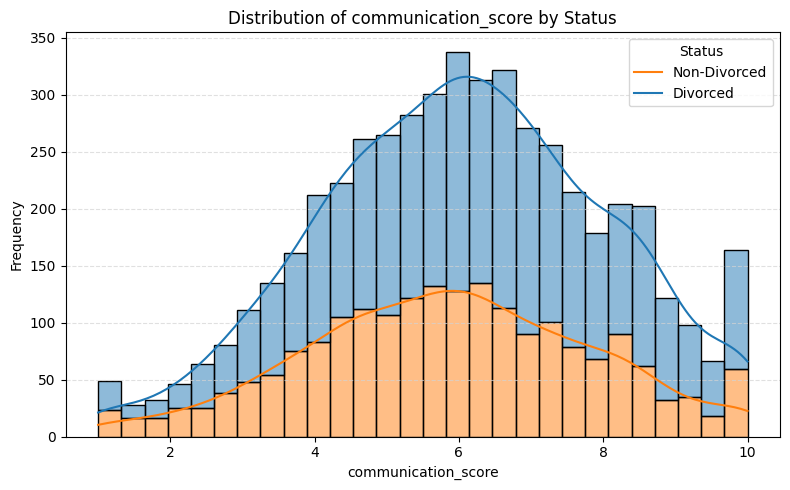

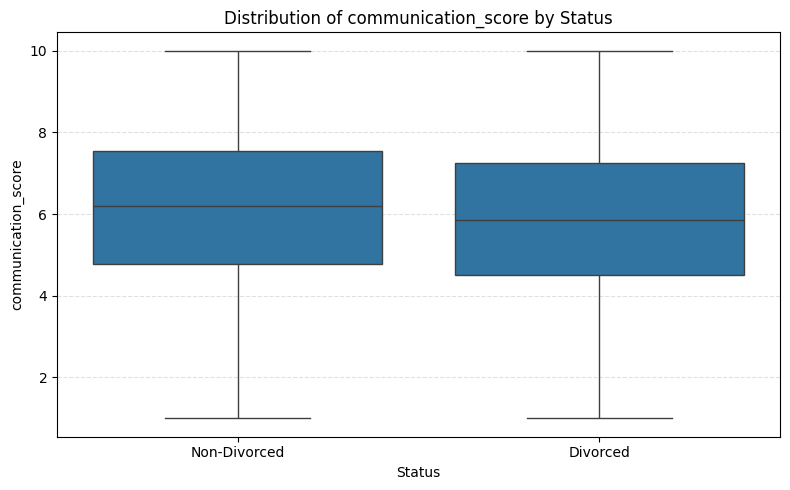


Analyzing column: conflict_frequency

Test of Assumption: Normality (Shapiro-Wilk Test and QQ Plots)
Note: Non-parametric tests do not assume normality, but understanding the distribution is still helpful.

Shapiro-Wilk Test for conflict_frequency (Divorced Group):
Statistic: 0.9231, P-value: 0.0000
Conclusion: Reject the null hypothesis. The data in the divorced group is likely not normally distributed.

Shapiro-Wilk Test for conflict_frequency (Non-Divorced Group):
Statistic: 0.9194, P-value: 0.0000
Conclusion: Reject the null hypothesis. The data in the non-divorced group is likely not normally distributed.


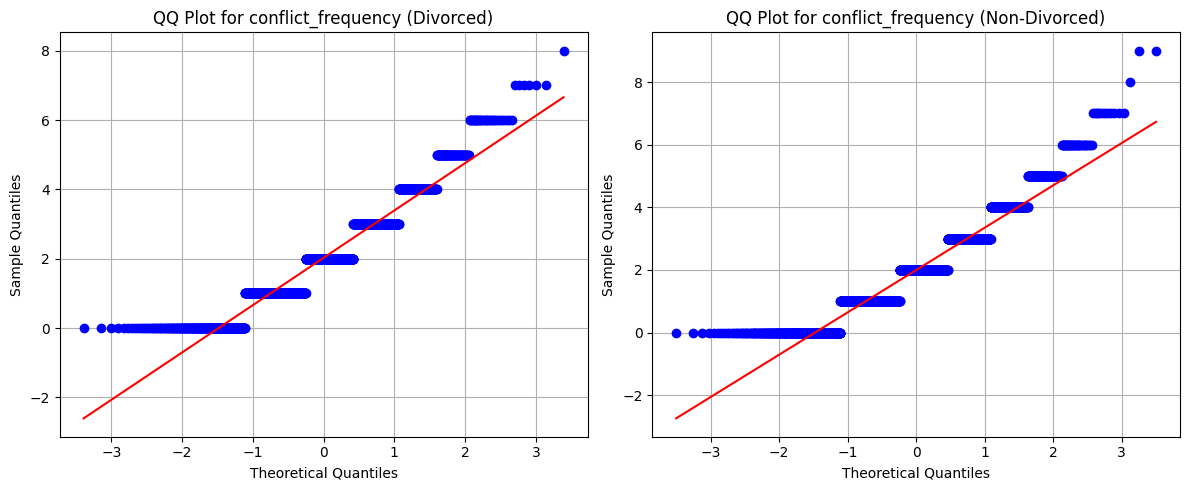


Test of Assumption: Equality of Variances (Levene's Test)
Null Hypothesis (H0): The variances of {col} are equal for divorced and non-divorced groups.
Working Hypothesis (H1): The variances of {col} are not equal for divorced and non-divorced groups.
Levene's Test Statistic: 0.4178, P-value: 0.5181
Conclusion: Fail to reject the null hypothesis. The variances may be equal.

Performing Mann-Whitney U Test:
Null Hypothesis (H0): The distribution of conflict_frequency is the same for divorced and non-divorced groups.
Working Hypothesis (H1): The distribution of conflict_frequency is different for divorced and non-divorced groups.

Mann-Whitney U Test Results for conflict_frequency:
Statistic: 3032194.5000
P-value: 0.4510
Conclusion: Fail to reject the null hypothesis. There is no significant difference in the distribution of conflict_frequency between divorced and non-divorced groups.


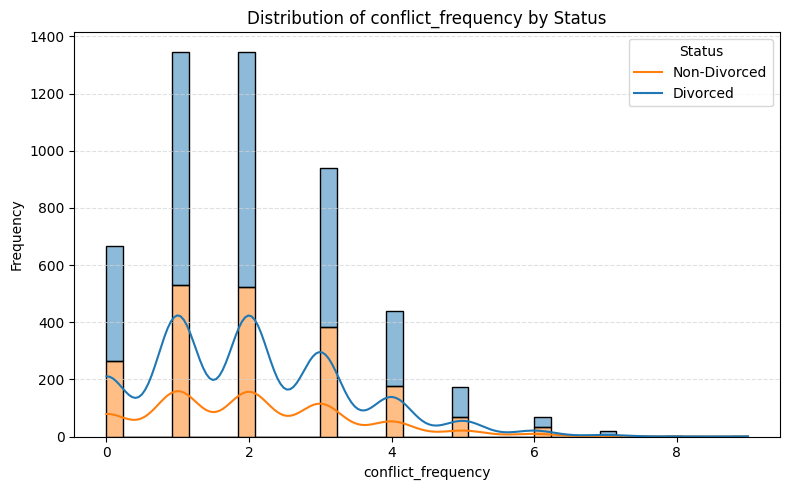

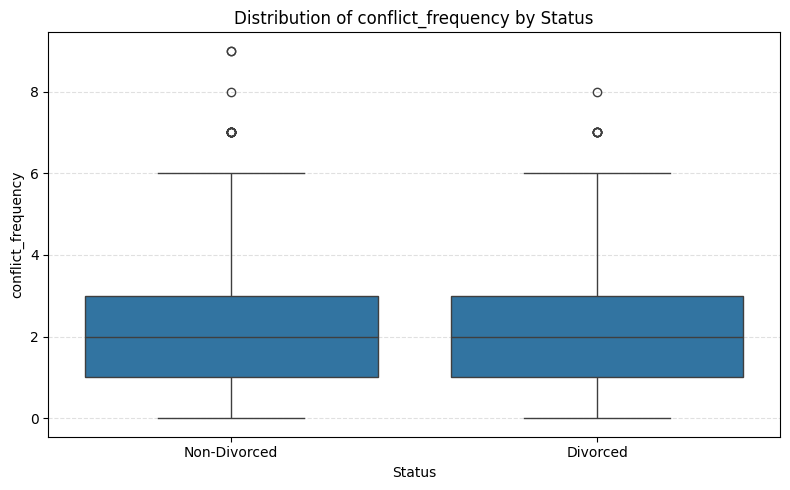


Analyzing column: financial_stress_level

Test of Assumption: Normality (Shapiro-Wilk Test and QQ Plots)
Note: Non-parametric tests do not assume normality, but understanding the distribution is still helpful.

Shapiro-Wilk Test for financial_stress_level (Divorced Group):
Statistic: 0.9834, P-value: 0.0000
Conclusion: Reject the null hypothesis. The data in the divorced group is likely not normally distributed.

Shapiro-Wilk Test for financial_stress_level (Non-Divorced Group):
Statistic: 0.9783, P-value: 0.0000
Conclusion: Reject the null hypothesis. The data in the non-divorced group is likely not normally distributed.


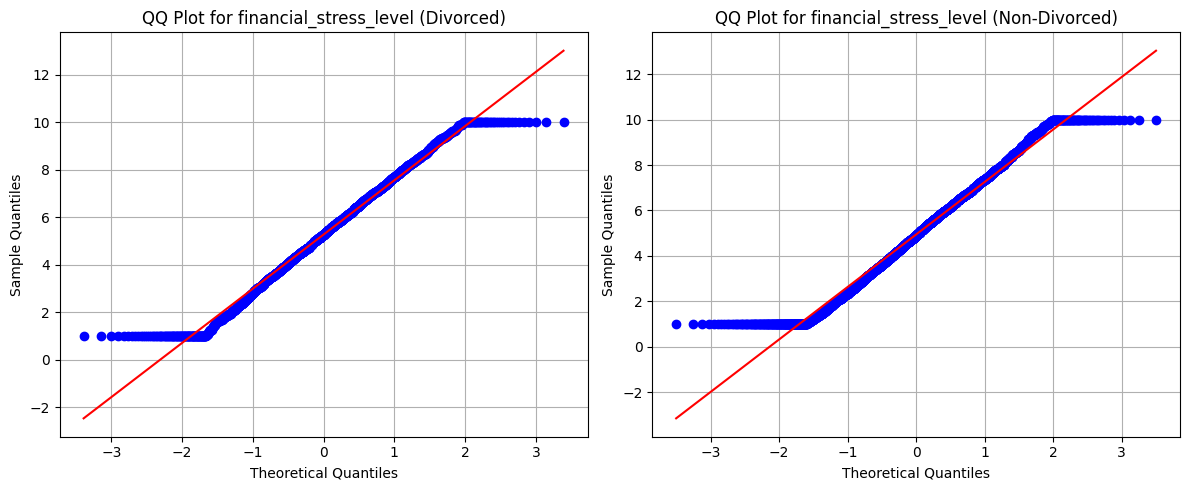


Test of Assumption: Equality of Variances (Levene's Test)
Null Hypothesis (H0): The variances of {col} are equal for divorced and non-divorced groups.
Working Hypothesis (H1): The variances of {col} are not equal for divorced and non-divorced groups.
Levene's Test Statistic: 1.1720, P-value: 0.2790
Conclusion: Fail to reject the null hypothesis. The variances may be equal.

Performing Mann-Whitney U Test:
Null Hypothesis (H0): The distribution of financial_stress_level is the same for divorced and non-divorced groups.
Working Hypothesis (H1): The distribution of financial_stress_level is different for divorced and non-divorced groups.

Mann-Whitney U Test Results for financial_stress_level:
Statistic: 3247556.0000
P-value: 0.0000
Conclusion: Reject the null hypothesis. There is a significant difference in the distribution of financial_stress_level between divorced and non-divorced groups.


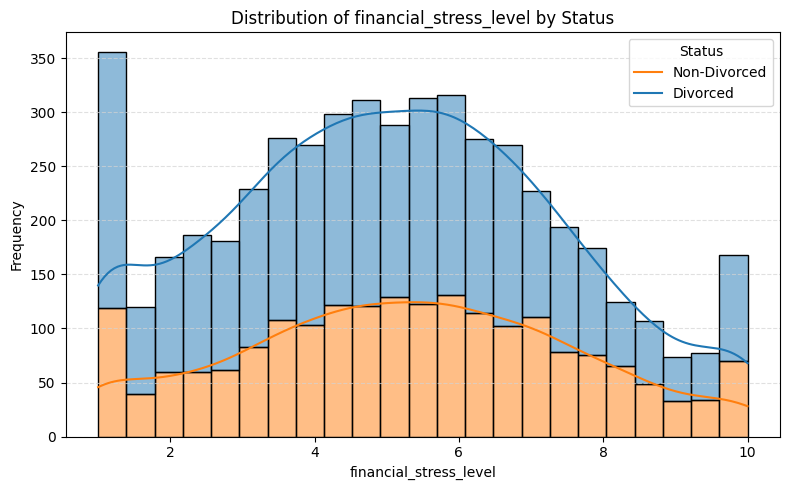

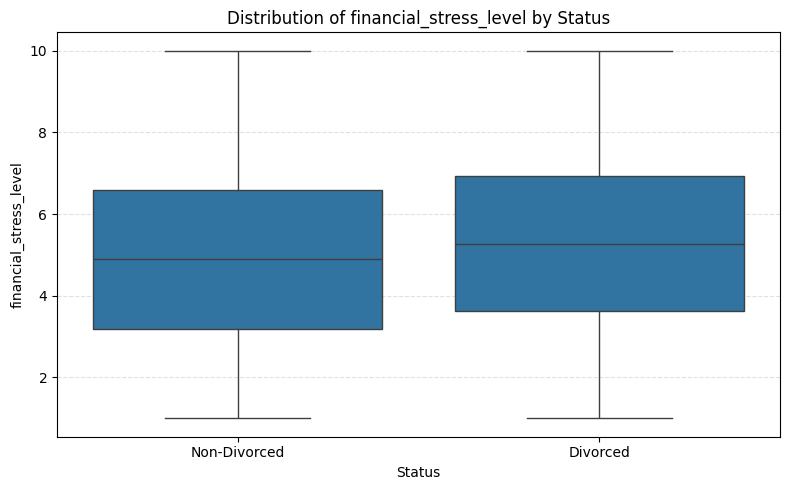


Analyzing column: social_support

Test of Assumption: Normality (Shapiro-Wilk Test and QQ Plots)
Note: Non-parametric tests do not assume normality, but understanding the distribution is still helpful.

Shapiro-Wilk Test for social_support (Divorced Group):
Statistic: 0.9933, P-value: 0.0000
Conclusion: Reject the null hypothesis. The data in the divorced group is likely not normally distributed.

Shapiro-Wilk Test for social_support (Non-Divorced Group):
Statistic: 0.9926, P-value: 0.0000
Conclusion: Reject the null hypothesis. The data in the non-divorced group is likely not normally distributed.


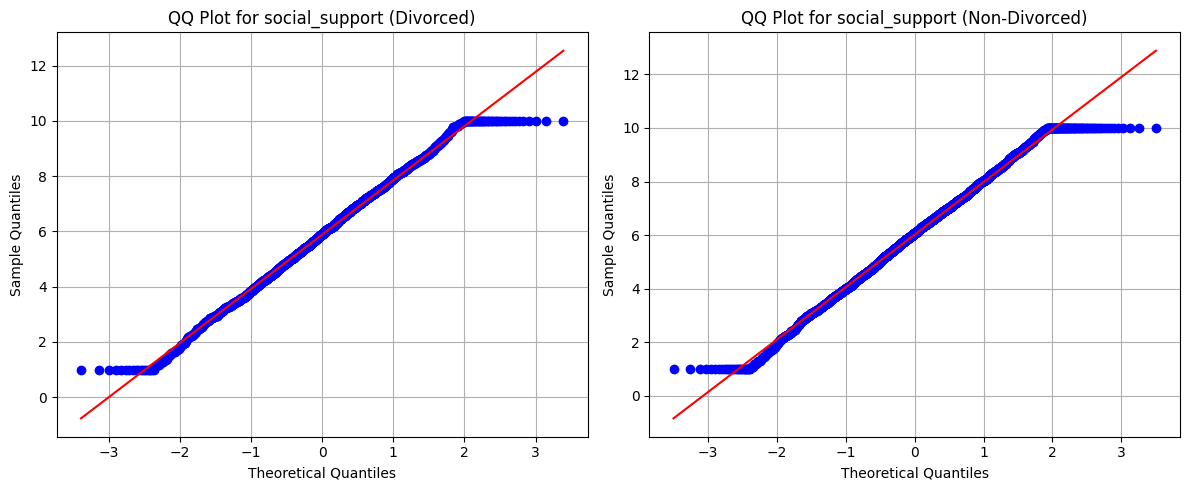


Test of Assumption: Equality of Variances (Levene's Test)
Null Hypothesis (H0): The variances of {col} are equal for divorced and non-divorced groups.
Working Hypothesis (H1): The variances of {col} are not equal for divorced and non-divorced groups.
Levene's Test Statistic: 0.1638, P-value: 0.6857
Conclusion: Fail to reject the null hypothesis. The variances may be equal.

Performing Mann-Whitney U Test:
Null Hypothesis (H0): The distribution of social_support is the same for divorced and non-divorced groups.
Working Hypothesis (H1): The distribution of social_support is different for divorced and non-divorced groups.

Mann-Whitney U Test Results for social_support:
Statistic: 2876970.5000
P-value: 0.0177
Conclusion: Reject the null hypothesis. There is a significant difference in the distribution of social_support between divorced and non-divorced groups.


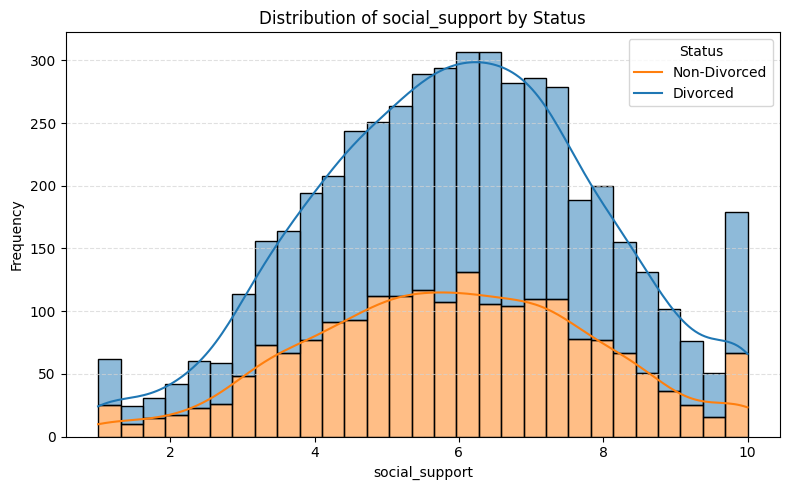

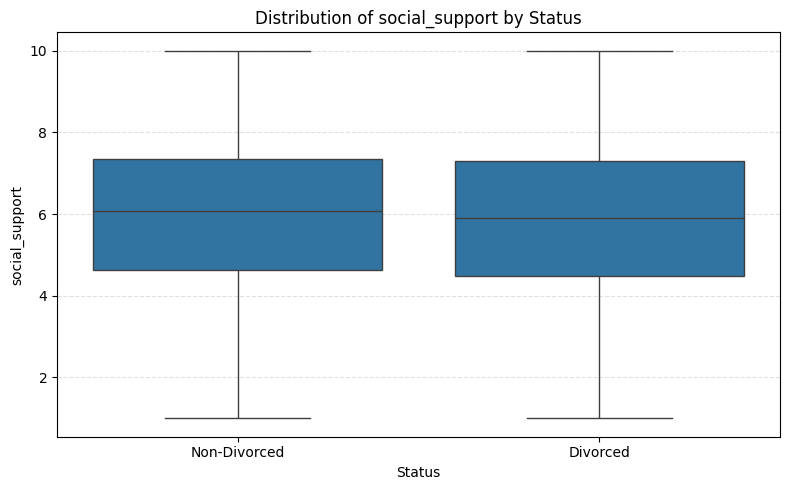


Analyzing column: shared_hobbies_count

Test of Assumption: Normality (Shapiro-Wilk Test and QQ Plots)
Note: Non-parametric tests do not assume normality, but understanding the distribution is still helpful.

Shapiro-Wilk Test for shared_hobbies_count (Divorced Group):
Statistic: 0.9485, P-value: 0.0000
Conclusion: Reject the null hypothesis. The data in the divorced group is likely not normally distributed.

Shapiro-Wilk Test for shared_hobbies_count (Non-Divorced Group):
Statistic: 0.9532, P-value: 0.0000
Conclusion: Reject the null hypothesis. The data in the non-divorced group is likely not normally distributed.


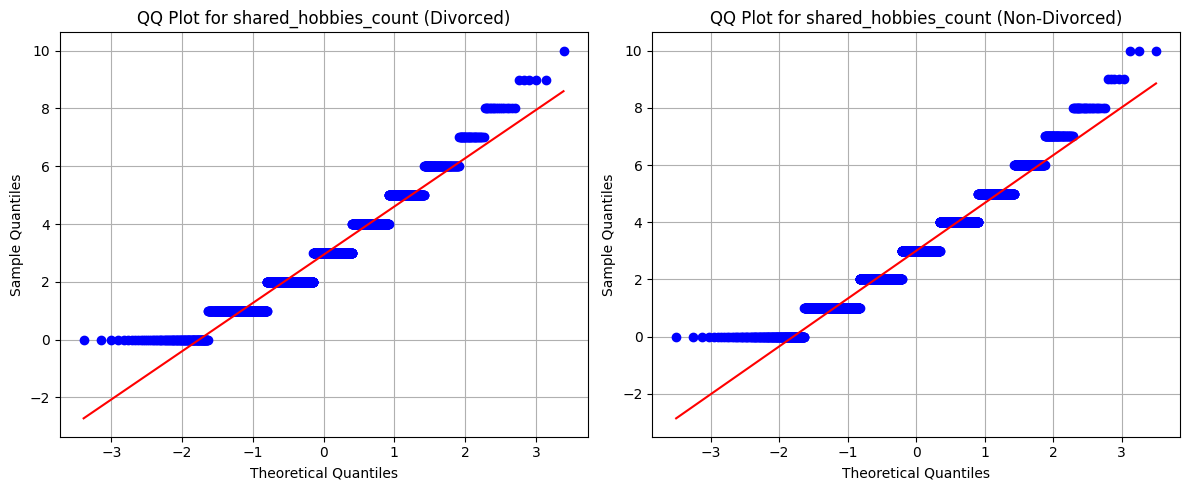


Test of Assumption: Equality of Variances (Levene's Test)
Null Hypothesis (H0): The variances of {col} are equal for divorced and non-divorced groups.
Working Hypothesis (H1): The variances of {col} are not equal for divorced and non-divorced groups.
Levene's Test Statistic: 0.0372, P-value: 0.8471
Conclusion: Fail to reject the null hypothesis. The variances may be equal.

Performing Mann-Whitney U Test:
Null Hypothesis (H0): The distribution of shared_hobbies_count is the same for divorced and non-divorced groups.
Working Hypothesis (H1): The distribution of shared_hobbies_count is different for divorced and non-divorced groups.

Mann-Whitney U Test Results for shared_hobbies_count:
Statistic: 2924809.0000
P-value: 0.1508
Conclusion: Fail to reject the null hypothesis. There is no significant difference in the distribution of shared_hobbies_count between divorced and non-divorced groups.


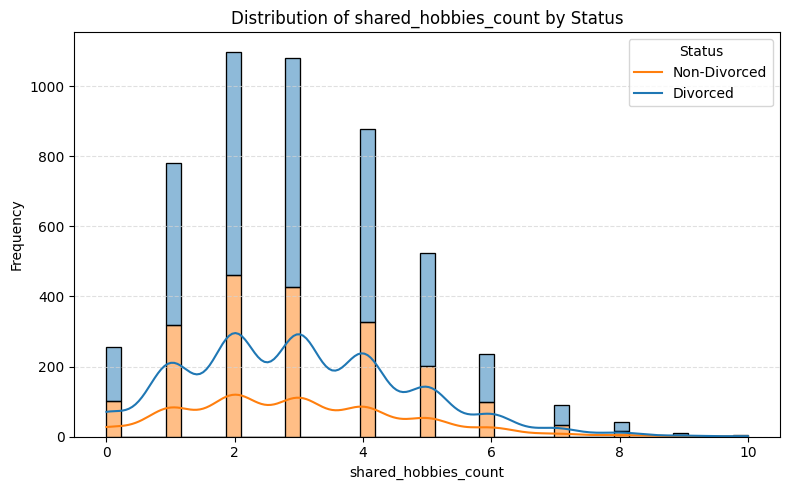

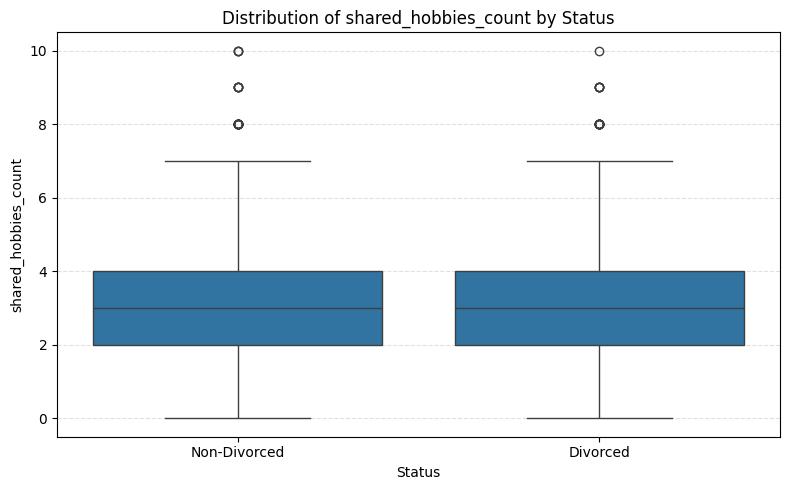


Analyzing column: trust_score

Test of Assumption: Normality (Shapiro-Wilk Test and QQ Plots)
Note: Non-parametric tests do not assume normality, but understanding the distribution is still helpful.

Shapiro-Wilk Test for trust_score (Divorced Group):
Statistic: 0.9931, P-value: 0.0000
Conclusion: Reject the null hypothesis. The data in the divorced group is likely not normally distributed.

Shapiro-Wilk Test for trust_score (Non-Divorced Group):
Statistic: 0.9934, P-value: 0.0000
Conclusion: Reject the null hypothesis. The data in the non-divorced group is likely not normally distributed.


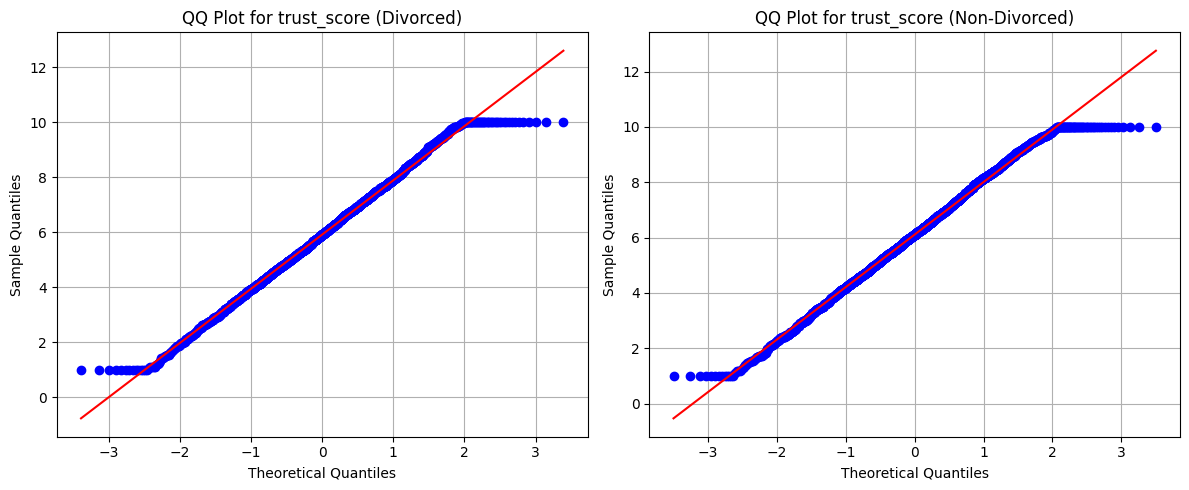


Test of Assumption: Equality of Variances (Levene's Test)
Null Hypothesis (H0): The variances of {col} are equal for divorced and non-divorced groups.
Working Hypothesis (H1): The variances of {col} are not equal for divorced and non-divorced groups.
Levene's Test Statistic: 3.8606, P-value: 0.0495
Conclusion: Reject the null hypothesis. The variances are likely unequal.

Performing Mann-Whitney U Test:
Null Hypothesis (H0): The distribution of trust_score is the same for divorced and non-divorced groups.
Working Hypothesis (H1): The distribution of trust_score is different for divorced and non-divorced groups.

Mann-Whitney U Test Results for trust_score:
Statistic: 2819117.0000
P-value: 0.0004
Conclusion: Reject the null hypothesis. There is a significant difference in the distribution of trust_score between divorced and non-divorced groups.


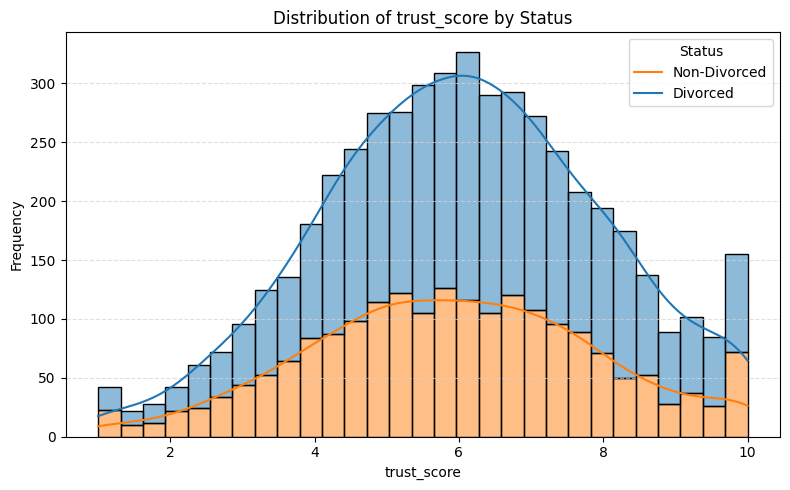

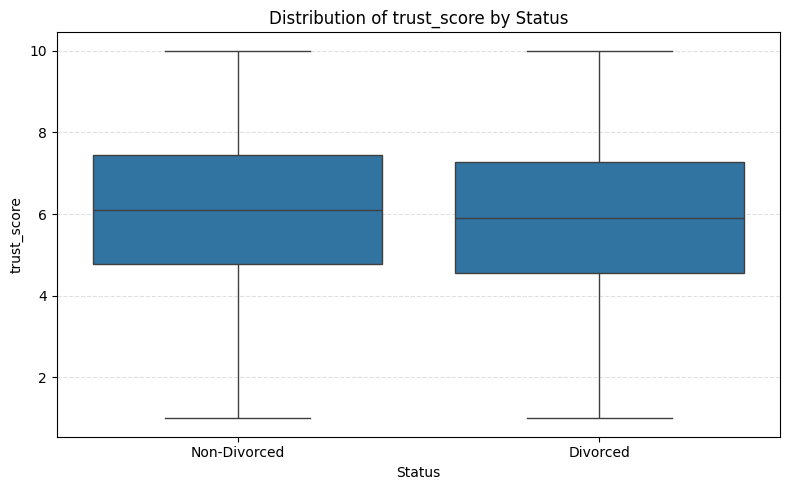

In [ ]:
# Step 2: Analyze Continuous Variables

from scipy.stats import ttest_ind, probplot, shapiro, levene, mannwhitneyu
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print("Analyzing Continuous Variables:")

# Exclude 'divorced' column from continuous variables for t-test
continuous_cols_for_test = [col for col in continuous_cols if col != 'divorced']

for col in continuous_cols_for_test:
    print(f"\nAnalyzing column: {col}")

    # Separate the data for the two groups
    group1 = df_divorced[col].dropna()  # Divorced group
    group0 = df_nondivorced[col].dropna() # Non-divorced group

    # Check for sufficient data in both groups
    if len(group1) < 2 or len(group0) < 2:
        print(f"Skipping analysis for {col} due to insufficient data in one or both groups.")
        continue

    # Test of Assumption: Normality (Shapiro-Wilk Test and QQ Plots)
    print("\nTest of Assumption: Normality (Shapiro-Wilk Test and QQ Plots)")
    print("Note: Non-parametric tests do not assume normality, but understanding the distribution is still helpful.")

    # Shapiro-Wilk Test for Normality
    # Null Hypothesis (H0): The data is drawn from a normal distribution.
    # Working Hypothesis (H1): The data is not drawn from a normal distribution.
    shapiro_group1 = shapiro(group1)
    shapiro_group0 = shapiro(group0)

    print(f"\nShapiro-Wilk Test for {col} (Divorced Group):")
    print(f"Statistic: {shapiro_group1.statistic:.4f}, P-value: {shapiro_group1.pvalue:.4f}")
    if shapiro_group1.pvalue < 0.05:
        print("Conclusion: Reject the null hypothesis. The data in the divorced group is likely not normally distributed.")
    else:
        print("Conclusion: Fail to reject the null hypothesis. The data in the divorced group may be normally distributed.")

    print(f"\nShapiro-Wilk Test for {col} (Non-Divorced Group):")
    print(f"Statistic: {shapiro_group0.statistic:.4f}, P-value: {shapiro_group0.pvalue:.4f}")
    if shapiro_group0.pvalue < 0.05:
        print("Conclusion: Reject the null hypothesis. The data in the non-divorced group is likely not normally distributed.")
    else:
        print("Conclusion: Fail to reject the null hypothesis. The data in the non-divorced group may be normally distributed.")

    # Generate QQ Plots to visually check normality assumption
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    probplot(group1, dist="norm", plot=plt)
    plt.title(f'QQ Plot for {col} (Divorced)')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    probplot(group0, dist="norm", plot=plt)
    plt.title(f'QQ Plot for {col} (Non-Divorced)')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    # Test of Assumption: Equality of Variances (Levene's Test)
    print("\nTest of Assumption: Equality of Variances (Levene's Test)")
    print("Null Hypothesis (H0): The variances of {col} are equal for divorced and non-divorced groups.")
    print("Working Hypothesis (H1): The variances of {col} are not equal for divorced and non-divorced groups.")
    levene_result = levene(group1, group0)
    print(f"Levene's Test Statistic: {levene_result.statistic:.4f}, P-value: {levene_result.pvalue:.4f}")

    if levene_result.pvalue < 0.05:
        print("Conclusion: Reject the null hypothesis. The variances are likely unequal.")
    else:
        print("Conclusion: Fail to reject the null hypothesis. The variances may be equal.")


    # Perform Mann-Whitney U Test (Non-parametric alternative to Independent Samples T-test)
    print("\nPerforming Mann-Whitney U Test:")
    print(f"Null Hypothesis (H0): The distribution of {col} is the same for divorced and non-divorced groups.")
    print(f"Working Hypothesis (H1): The distribution of {col} is different for divorced and non-divorced groups.")
    mannwhitneyu_result = mannwhitneyu(group1, group0)

    print(f"\nMann-Whitney U Test Results for {col}:")
    print(f"Statistic: {mannwhitneyu_result.statistic:.4f}")
    print(f"P-value: {mannwhitneyu_result.pvalue:.4f}")

    alpha = 0.05
    if mannwhitneyu_result.pvalue < alpha:
        print(f"Conclusion: Reject the null hypothesis. There is a significant difference in the distribution of {col} between divorced and non-divorced groups.")
    else:
        print(f"Conclusion: Fail to reject the null hypothesis. There is no significant difference in the distribution of {col} between divorced and non-divorced groups.")

    # Visualize with Histogram
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df_copy, x=col, hue='divorced', kde=True, multiple='stack')
    plt.title(f'Distribution of {col} by Status') # Updated title
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7, color='lightgray')
    plt.legend(title='Status', labels=['Non-Divorced', 'Divorced']) # Updated legend title
    plt.tight_layout()
    plt.show()

    # Visualize with Box Plot
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df_copy, x='divorced', y=col)
    plt.title(f'Distribution of {col} by Status') # Updated title
    plt.xlabel('Status') # Updated x-axis label
    plt.ylabel(col)
    plt.xticks([0, 1], ['Non-Divorced', 'Divorced'])
    plt.grid(axis='y', linestyle='--', alpha=0.7, color='lightgray')
    plt.tight_layout()
    plt.show()

Analyzing Categorical Variables:

Analyzing column: education_level
Contingency Table:


divorced,0,1
education_level,,
Bachelor,1267,802
High School,908,605
Master,561,402
No Formal Education,151,80
PhD,122,102



Chi-Squared Test Results for education_level:
Chi-Statistic: 8.1195
P-value: 0.0873
Degrees of Freedom: 4
Conclusion: Fail to reject the null hypothesis. There is no significant association between education_level between divorced and non-divorced groups.


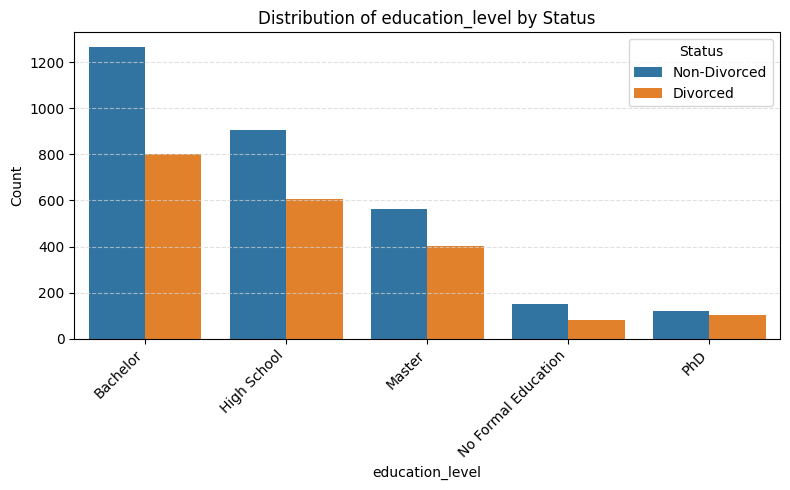


Analyzing column: employment_status
Contingency Table:


divorced,0,1
employment_status,,
Full-time,1496,991
Homemaker,443,305
Part-time,637,391
Unemployed,433,304



Chi-Squared Test Results for employment_status:
Chi-Statistic: 2.2799
P-value: 0.5164
Degrees of Freedom: 3
Conclusion: Fail to reject the null hypothesis. There is no significant association between employment_status between divorced and non-divorced groups.


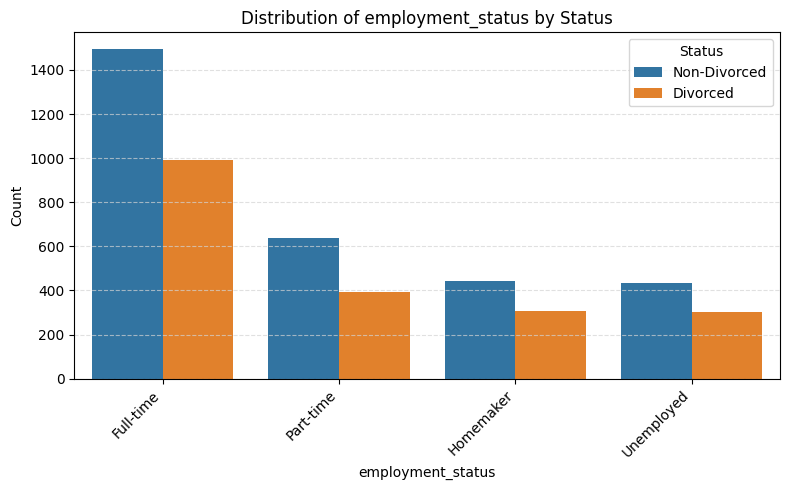


Analyzing column: religious_compatibility
Contingency Table:


divorced,0,1
religious_compatibility,,
Different Religion,565,392
Not Religious,621,382
Same Religion,1823,1217



Chi-Squared Test Results for religious_compatibility:
Chi-Statistic: 1.8366
P-value: 0.3992
Degrees of Freedom: 2
Conclusion: Fail to reject the null hypothesis. There is no significant association between religious_compatibility between divorced and non-divorced groups.


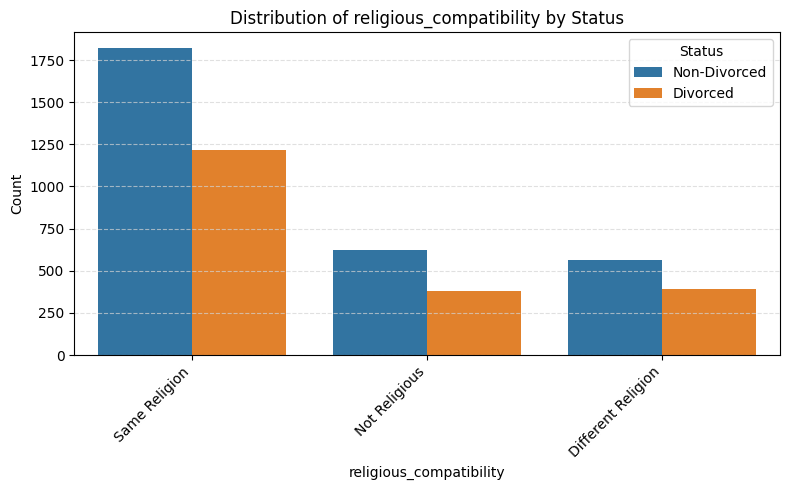


Analyzing column: cultural_background_match
Contingency Table:


divorced,0,1
cultural_background_match,,
No,725,498
Yes,2284,1493



Chi-Squared Test Results for cultural_background_match:
Chi-Statistic: 0.4981
P-value: 0.4803
Degrees of Freedom: 1
Conclusion: Fail to reject the null hypothesis. There is no significant association between cultural_background_match between divorced and non-divorced groups.


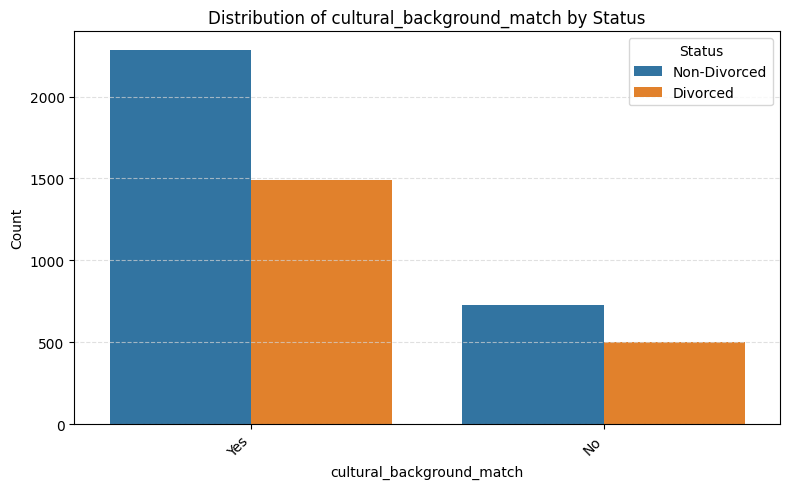


Analyzing column: conflict_resolution_style
Contingency Table:


divorced,0,1
conflict_resolution_style,,
Aggressive,595,399
Avoidant,777,473
Collaborative,1219,809
Passive,418,310



Chi-Squared Test Results for conflict_resolution_style:
Chi-Statistic: 4.4102
P-value: 0.2204
Degrees of Freedom: 3
Conclusion: Fail to reject the null hypothesis. There is no significant association between conflict_resolution_style between divorced and non-divorced groups.


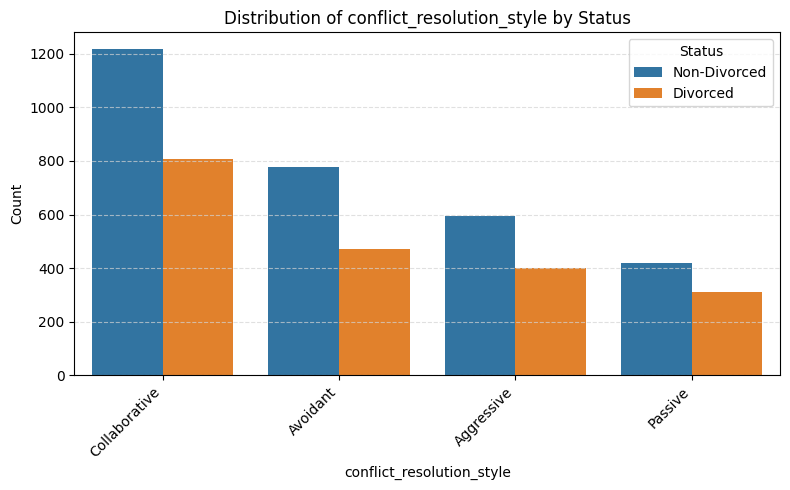


Analyzing column: mental_health_issues
Contingency Table:


divorced,0,1
mental_health_issues,,
No,2433,1548
Yes,576,443



Chi-Squared Test Results for mental_health_issues:
Chi-Statistic: 6.9405
P-value: 0.0084
Degrees of Freedom: 1
Conclusion: Reject the null hypothesis. There is a significant association between mental_health_issues and divorced status.


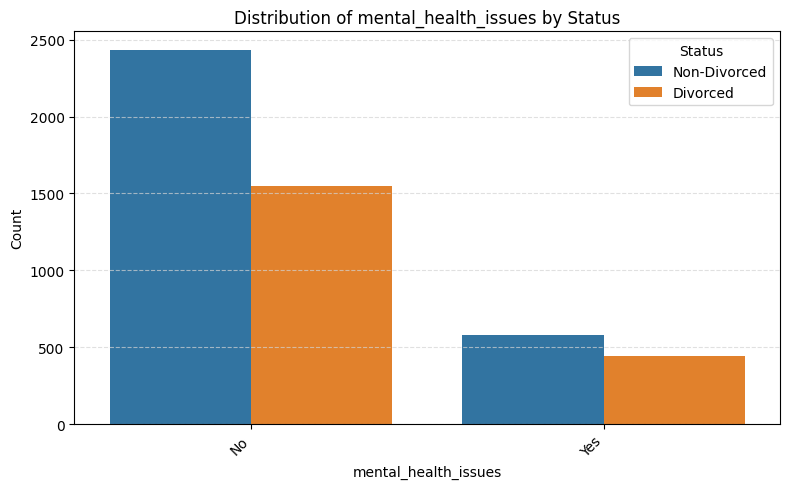


Analyzing column: infidelity_occurred
Contingency Table:


divorced,0,1
infidelity_occurred,,
No,2626,1629
Yes,383,362



Chi-Squared Test Results for infidelity_occurred:
Chi-Statistic: 27.6732
P-value: 0.0000
Degrees of Freedom: 1
Conclusion: Reject the null hypothesis. There is a significant association between infidelity_occurred and divorced status.


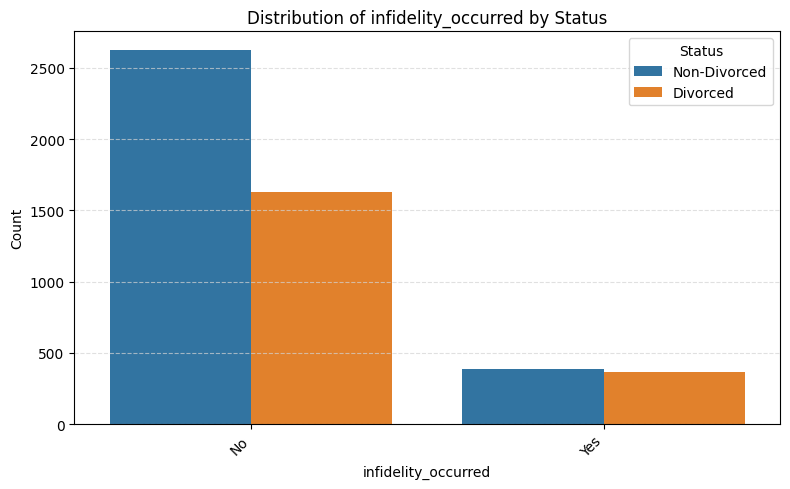


Analyzing column: counseling_attended
Contingency Table:


divorced,0,1
counseling_attended,,
No,2295,1503
Yes,714,488



Chi-Squared Test Results for counseling_attended:
Chi-Statistic: 0.3591
P-value: 0.5490
Degrees of Freedom: 1
Conclusion: Fail to reject the null hypothesis. There is no significant association between counseling_attended between divorced and non-divorced groups.


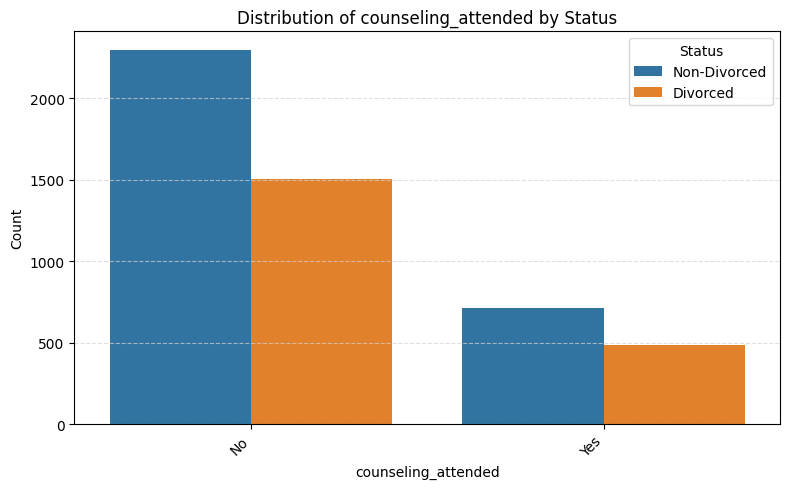


Analyzing column: marriage_type
Contingency Table:


divorced,0,1
marriage_type,,
Arranged,747,484
Love,2100,1413
Other,162,94



Chi-Squared Test Results for marriage_type:
Chi-Statistic: 1.3940
P-value: 0.4981
Degrees of Freedom: 2
Conclusion: Fail to reject the null hypothesis. There is no significant association between marriage_type between divorced and non-divorced groups.


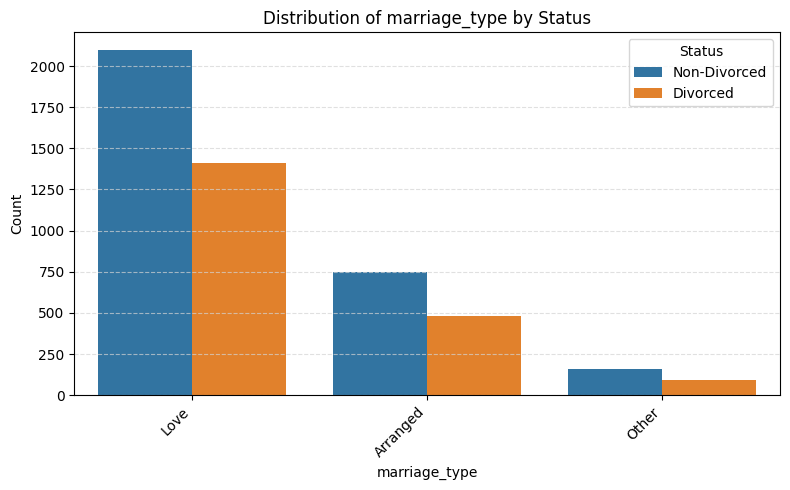


Analyzing column: pre_marital_cohabitation
Contingency Table:


divorced,0,1
pre_marital_cohabitation,,
No,1197,842
Yes,1812,1149



Chi-Squared Test Results for pre_marital_cohabitation:
Chi-Statistic: 3.0218
P-value: 0.0822
Degrees of Freedom: 1
Conclusion: Fail to reject the null hypothesis. There is no significant association between pre_marital_cohabitation between divorced and non-divorced groups.


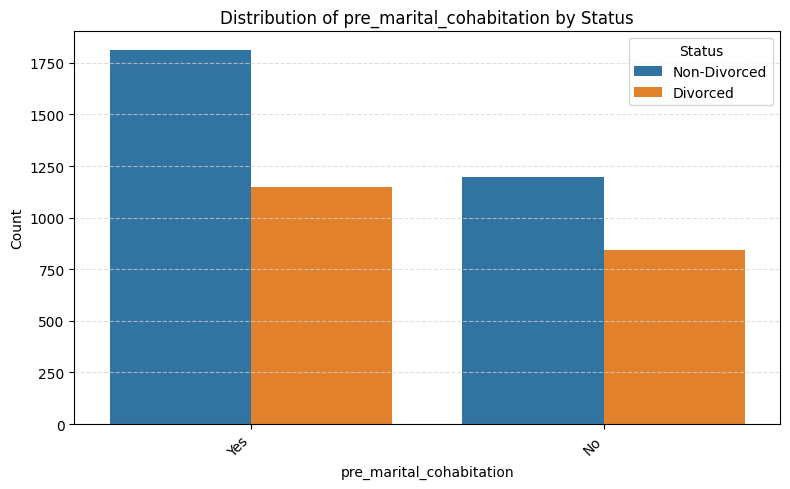


Analyzing column: domestic_violence_history
Contingency Table:


divorced,0,1
domestic_violence_history,,
No,2900,1848
Yes,109,143



Chi-Squared Test Results for domestic_violence_history:
Chi-Statistic: 30.9867
P-value: 0.0000
Degrees of Freedom: 1
Conclusion: Reject the null hypothesis. There is a significant association between domestic_violence_history and divorced status.


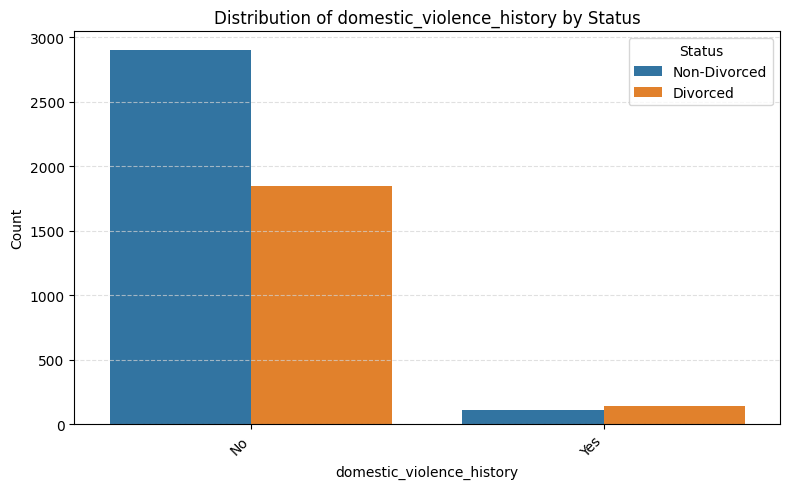

In [ ]:
# Analyze Categorical Variables with Chi-Squared Test and Bar Plots

from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

print("Analyzing Categorical Variables:")

# Use the categorical_cols identified earlier
for col in categorical_cols:
    print(f"\nAnalyzing column: {col}")

    # Create a contingency table
    contingency_table = pd.crosstab(df_copy[col], df_copy['divorced'])
    print("Contingency Table:")
    display(contingency_table)

    # Perform Chi-Squared Test
    # Null Hypothesis (H0): There is no significant association between {col} and divorced status.
    # Working Hypothesis (H1): There is a significant association between {col} and divorced status.
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    print(f"\nChi-Squared Test Results for {col}:")
    print(f"Chi-Statistic: {chi2:.4f}")
    print(f"P-value: {p:.4f}")
    print(f"Degrees of Freedom: {dof}")

    alpha = 0.05
    if p < alpha:
        print(f"Conclusion: Reject the null hypothesis. There is a significant association between {col} and divorced status.")
    else:
        print(f"Conclusion: Fail to reject the null hypothesis. There is no significant association between {col} between divorced status.")

    # Visualize with Bar Plot
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df_copy, x=col, hue='divorced', order=df_copy[col].value_counts().index)
    plt.title(f'Distribution of {col} by Status')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Status', labels=['Non-Divorced', 'Divorced']) # Update legend labels and title
    plt.grid(axis='y', linestyle='--', alpha=0.7, color='lightgray')
    plt.tight_layout()
    plt.show()